In [1]:
import sys
sys.path.insert(0,'..')

import numpy as np

import gym
import stable_baselines
from stable_baselines import A2C, ACER, ACKTR, DQN, DDPG, SAC, PPO1, PPO2, TD3, TRPO
from stable_baselines.common.env_checker import check_env
from stable_baselines.common.policies import MlpPolicy

from fakegym.fakegym import FakeGym
import importlib

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [2]:
class MyObservation():
    def __init__(self, env):
        self.env = env
        self.gps_actual = None
        self.gps_target = None
        self.distance = None
        self.touching = None

    def _update(self):
        self.gps_actual = self.env.state_object.gps_actual
        self.gps_target = self.env.state_object.gps_target
        self.distance = self.env.state_object.distance
        self.touching = self.env.state_object.touching

    def shape(self):
        """Make sure length is correct here.In this example:
        gps_actual: 2
        gps_target: 2
        distance:   4
        touching:   1
        =================
                   (9, )
        
        """
        return (9, )

    def get(self, env):
        """Get observation as numpy array."""
        self._update()
        
        arr = np.empty(0)
        arr = np.hstack((arr, np.array(self.gps_actual)))
        arr = np.hstack((arr, np.array(self.gps_target)))
        arr = np.hstack((arr, np.array(self.distance)))
        arr = np.hstack((arr, np.array(self.touching)))
        
        return arr
    

class MyEnv(FakeGym):
    def __init__(self, seed=None, N=10, num_of_sensors=4, obs_len=1, obstacles_each=4,
                 step_range=(1, 1), action_type="discrete",
                 discrete_action_shaping="flatten", obs=MyObservation):
        super(MyEnv, self).__init__(seed, N, num_of_sensors, obstacles_each, step_range, action_type, discrete_action_shaping, obs, obs_len=1)
        

    def calc_reward(self):
        """Calculate reward function.

        Idea(Mats):
        - negative reward for normal move so that james moves faster to goal
        - still lower negative reward if james gets closer to goal
        - high positive award for reaching it
        - high negative award to hitting a wall
        - epsilon only to divide never by 0

        """
        if self.gps_actual == self.gps_target:
            reward = 1000
        else:
            epsilon = 10**-5
            cost_step = 1
            distance = self.get_target_distance()+epsilon
            cost_distance = (distance**0.4)/(distance)
            reward_factor = -1
            reward = reward_factor * (cost_step * cost_distance)
            if self.state_object:
                reward = reward - 10
        return reward
        
        
    def check_done(self):
        if self.com.time_steps == 1000:
            return True
        if self.gps_actual == self.gps_target:
            return True
        return False


env = MyEnv()
check_env(env)

/home/pj/anaconda3/envs/spinningup/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [4]:
time_steps = 2*10**5
model_name = "PPO1_fake_200k"
model = PPO1("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=time_steps, log_interval=10000)
model.save("../models/keep/{}".format(model_name))
del model





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.










Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
********** Iteration 0 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00070 |      -0.01386 |      5.79e+04 |       0.00020 |       1.38613
     -0.01138 |      -0.01385 |      5.77e+04 |       0.00175 |       1.38466
     -0.02054 |      -0.01381 |      5.75e+04 |       0.00571 |       1.38082
     -0.02121 |      -0.01375 |      5.73e+04 |       0.01146 |       1.37521
Evaluating losses...
     -0.02088 |      -0.01373 |      5.71e+04 |       0.01363 |       1.37313
----------------------------------
| EpLenMean       | 251          |
| EpRewMean       | -2.04e+03    |
| EpThisIter      | 1            |
| EpisodesSoFar   | 1            |
| TimeElapsed     | 1.33         |
| Timesteps

     -0.01035 |      -0.01354 |      5.20e+04 |       0.00323 |       1.35446
     -0.02395 |      -0.01364 |      5.19e+04 |       0.01155 |       1.36371
     -0.02367 |      -0.01368 |      5.18e+04 |       0.02159 |       1.36787
Evaluating losses...
     -0.02492 |      -0.01370 |      5.17e+04 |       0.02335 |       1.37036
----------------------------------
| EpLenMean       | 195          |
| EpRewMean       | -1.35e+03    |
| EpThisIter      | 1            |
| EpisodesSoFar   | 6            |
| TimeElapsed     | 4.45         |
| TimestepsSoFar  | 1280         |
| ev_tdlam_before | -0.000291    |
| loss_ent        | 1.3703628    |
| loss_kl         | 0.023353169  |
| loss_pol_entpen | -0.013703627 |
| loss_pol_surr   | -0.024916152 |
| loss_vf_loss    | 51745.363    |
----------------------------------
********** Iteration 5 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00199 |      -0.01372 |      3.55e+04 |  

     -0.00147 |      -0.01375 |      3.40e+04 |       0.00190 |       1.37525
     -0.00153 |      -0.01373 |      3.39e+04 |       0.00411 |       1.37343
     -0.00382 |      -0.01372 |      3.37e+04 |       0.00654 |       1.37212
Evaluating losses...
     -0.00544 |      -0.01372 |      3.37e+04 |       0.00789 |       1.37172
-----------------------------------
| EpLenMean       | 181           |
| EpRewMean       | -1.17e+03     |
| EpThisIter      | 0             |
| EpisodesSoFar   | 15            |
| TimeElapsed     | 10.4          |
| TimestepsSoFar  | 3328          |
| ev_tdlam_before | -4.07e-05     |
| loss_ent        | 1.3717239     |
| loss_kl         | 0.007886733   |
| loss_pol_entpen | -0.013717239  |
| loss_pol_surr   | -0.0054381546 |
| loss_vf_loss    | 33665.77      |
-----------------------------------
********** Iteration 13 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00085 |      -0.01371 |   

     -0.00352 |      -0.01345 |      3.38e+04 |       0.00154 |       1.34464
     -0.00822 |      -0.01340 |      3.37e+04 |       0.00489 |       1.34011
     -0.00926 |      -0.01332 |      3.36e+04 |       0.00882 |       1.33190
Evaluating losses...
     -0.01158 |      -0.01326 |      3.35e+04 |       0.01028 |       1.32609
----------------------------------
| EpLenMean       | 220          |
| EpRewMean       | -1.67e+03    |
| EpThisIter      | 0            |
| EpisodesSoFar   | 21           |
| TimeElapsed     | 15.7         |
| TimestepsSoFar  | 5376         |
| ev_tdlam_before | -9.92e-05    |
| loss_ent        | 1.3260901    |
| loss_kl         | 0.010278178  |
| loss_pol_entpen | -0.013260901 |
| loss_pol_surr   | -0.011582978 |
| loss_vf_loss    | 33497.766    |
----------------------------------
********** Iteration 21 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00066 |      -0.01309 |      3.20e+04 | 

     -0.01974 |      -0.01091 |      4.03e+04 |       0.00625 |       1.09072
     -0.02261 |      -0.01013 |      4.01e+04 |       0.02391 |       1.01312
     -0.01987 |      -0.01007 |      4.00e+04 |       0.02748 |       1.00736
Evaluating losses...
     -0.02234 |      -0.01038 |      3.99e+04 |       0.02083 |       1.03776
----------------------------------
| EpLenMean       | 279          |
| EpRewMean       | -2.44e+03    |
| EpThisIter      | 0            |
| EpisodesSoFar   | 24           |
| TimeElapsed     | 20.9         |
| TimestepsSoFar  | 7424         |
| ev_tdlam_before | 7.59e-05     |
| loss_ent        | 1.0377593    |
| loss_kl         | 0.020829896  |
| loss_pol_entpen | -0.010377593 |
| loss_pol_surr   | -0.022335004 |
| loss_vf_loss    | 39933.17     |
----------------------------------
********** Iteration 29 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00071 |      -0.01047 |      3.98e+04 | 

     -0.00139 |      -0.01063 |      3.28e+04 |       0.00066 |       1.06348
     -0.00729 |      -0.01097 |      3.27e+04 |       0.00437 |       1.09726
     -0.00289 |      -0.01149 |      3.26e+04 |       0.01775 |       1.14858
Evaluating losses...
     -0.00169 |      -0.01161 |      3.26e+04 |       0.02161 |       1.16092
-----------------------------------
| EpLenMean       | 334           |
| EpRewMean       | -3.19e+03     |
| EpThisIter      | 0             |
| EpisodesSoFar   | 26            |
| TimeElapsed     | 26.1          |
| TimestepsSoFar  | 9472          |
| ev_tdlam_before | -9.3e-06      |
| loss_ent        | 1.1609204     |
| loss_kl         | 0.02161032    |
| loss_pol_entpen | -0.011609204  |
| loss_pol_surr   | -0.0016914713 |
| loss_vf_loss    | 32577.594     |
-----------------------------------
********** Iteration 37 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00100 |      -0.01163 |   

     -0.00473 |      -0.01271 |      8.13e+04 |       0.00105 |       1.27142
     -0.00972 |      -0.01275 |      8.13e+04 |       0.00386 |       1.27456
     -0.01405 |      -0.01278 |      8.13e+04 |       0.00768 |       1.27757
Evaluating losses...
     -0.01618 |      -0.01280 |      8.13e+04 |       0.00984 |       1.27952
----------------------------------
| EpLenMean       | 343          |
| EpRewMean       | -3.32e+03    |
| EpThisIter      | 2            |
| EpisodesSoFar   | 33           |
| TimeElapsed     | 31.3         |
| TimestepsSoFar  | 11520        |
| ev_tdlam_before | 1.23e-05     |
| loss_ent        | 1.279524     |
| loss_kl         | 0.009835944  |
| loss_pol_entpen | -0.01279524  |
| loss_pol_surr   | -0.016180616 |
| loss_vf_loss    | 81275.83     |
----------------------------------
********** Iteration 45 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00147 |      -0.01276 |      5.69e+04 | 

     -0.00974 |      -0.01251 |      3.37e+04 |       0.00193 |       1.25098
     -0.02025 |      -0.01243 |      3.36e+04 |       0.00870 |       1.24340
     -0.02273 |      -0.01245 |      3.35e+04 |       0.01401 |       1.24521
Evaluating losses...
     -0.02503 |      -0.01251 |      3.34e+04 |       0.01425 |       1.25098
----------------------------------
| EpLenMean       | 350          |
| EpRewMean       | -3.39e+03    |
| EpThisIter      | 0            |
| EpisodesSoFar   | 37           |
| TimeElapsed     | 36.5         |
| TimestepsSoFar  | 13568        |
| ev_tdlam_before | 4.42e-05     |
| loss_ent        | 1.2509768    |
| loss_kl         | 0.014249427  |
| loss_pol_entpen | -0.012509768 |
| loss_pol_surr   | -0.025025094 |
| loss_vf_loss    | 33412.203    |
----------------------------------
********** Iteration 53 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00088 |      -0.01250 |      3.49e+04 | 

      0.00301 |      -0.01342 |      1.14e+05 |       0.00334 |       1.34190
     -0.00780 |      -0.01352 |      1.14e+05 |       0.00850 |       1.35168
     -0.01272 |      -0.01350 |      1.14e+05 |       0.00677 |       1.34965
Evaluating losses...
     -0.01493 |      -0.01345 |      1.14e+05 |       0.00446 |       1.34524
----------------------------------
| EpLenMean       | 317          |
| EpRewMean       | -2.95e+03    |
| EpThisIter      | 4            |
| EpisodesSoFar   | 49           |
| TimeElapsed     | 41.7         |
| TimestepsSoFar  | 15616        |
| ev_tdlam_before | 1.01e-06     |
| loss_ent        | 1.3452358    |
| loss_kl         | 0.0044643795 |
| loss_pol_entpen | -0.013452357 |
| loss_pol_surr   | -0.014932459 |
| loss_vf_loss    | 114155.07    |
----------------------------------
********** Iteration 61 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     5.56e-05 |      -0.01318 |      1.25e+05 | 

     -0.01762 |      -0.01276 |      2.08e+05 |       0.00867 |       1.27636
     -0.02174 |      -0.01268 |      2.07e+05 |       0.01523 |       1.26755
     -0.02729 |      -0.01257 |      2.07e+05 |       0.01403 |       1.25719
Evaluating losses...
     -0.03398 |      -0.01255 |      2.07e+05 |       0.00995 |       1.25534
----------------------------------
| EpLenMean       | 228          |
| EpRewMean       | -1.85e+03    |
| EpThisIter      | 8            |
| EpisodesSoFar   | 77           |
| TimeElapsed     | 47           |
| TimestepsSoFar  | 17664        |
| ev_tdlam_before | 2.15e-06     |
| loss_ent        | 1.2553387    |
| loss_kl         | 0.00994827   |
| loss_pol_entpen | -0.012553386 |
| loss_pol_surr   | -0.033981062 |
| loss_vf_loss    | 207306.0     |
----------------------------------
********** Iteration 69 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00043 |      -0.01296 |      1.50e+05 | 

     -0.00995 |      -0.01280 |      3.85e+04 |       0.00436 |       1.27976
     -0.00975 |      -0.01268 |      3.84e+04 |       0.01103 |       1.26841
     -0.01457 |      -0.01271 |      3.83e+04 |       0.00854 |       1.27080
Evaluating losses...
     -0.01726 |      -0.01276 |      3.82e+04 |       0.00548 |       1.27563
----------------------------------
| EpLenMean       | 188          |
| EpRewMean       | -1.34e+03    |
| EpThisIter      | 0            |
| EpisodesSoFar   | 103          |
| TimeElapsed     | 52.6         |
| TimestepsSoFar  | 19712        |
| ev_tdlam_before | -4.77e-07    |
| loss_ent        | 1.2756286    |
| loss_kl         | 0.0054751188 |
| loss_pol_entpen | -0.012756285 |
| loss_pol_surr   | -0.01725836  |
| loss_vf_loss    | 38234.656    |
----------------------------------
********** Iteration 77 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00171 |      -0.01271 |      3.63e+04 | 

     -0.00582 |      -0.01200 |      1.79e+05 |       0.00113 |       1.19959
     -0.01680 |      -0.01195 |      1.79e+05 |       0.00475 |       1.19468
     -0.01907 |      -0.01193 |      1.78e+05 |       0.00962 |       1.19330
Evaluating losses...
     -0.02612 |      -0.01196 |      1.78e+05 |       0.01013 |       1.19577
----------------------------------
| EpLenMean       | 160          |
| EpRewMean       | -1.04e+03    |
| EpThisIter      | 6            |
| EpisodesSoFar   | 123          |
| TimeElapsed     | 58.8         |
| TimestepsSoFar  | 21760        |
| ev_tdlam_before | 0.0002       |
| loss_ent        | 1.1957705    |
| loss_kl         | 0.010132786  |
| loss_pol_entpen | -0.011957704 |
| loss_pol_surr   | -0.026124064 |
| loss_vf_loss    | 177816.98    |
----------------------------------
********** Iteration 85 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00111 |      -0.01206 |      1.99e+05 | 

     -0.01548 |      -0.01109 |      2.61e+05 |       0.00411 |       1.10932
     -0.02066 |      -0.01094 |      2.55e+05 |       0.01205 |       1.09413
     -0.02630 |      -0.01085 |      2.52e+05 |       0.01551 |       1.08496
Evaluating losses...
     -0.03376 |      -0.01083 |      2.50e+05 |       0.01539 |       1.08336
----------------------------------
| EpLenMean       | 65.1         |
| EpRewMean       | 149          |
| EpThisIter      | 15           |
| EpisodesSoFar   | 165          |
| TimeElapsed     | 64.5         |
| TimestepsSoFar  | 23808        |
| ev_tdlam_before | -0.0316      |
| loss_ent        | 1.0833564    |
| loss_kl         | 0.015386434  |
| loss_pol_entpen | -0.010833562 |
| loss_pol_surr   | -0.033762995 |
| loss_vf_loss    | 250120.48    |
----------------------------------
********** Iteration 93 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00113 |      -0.01171 |      8.69e+04 | 

     -0.00689 |      -0.01154 |      1.82e+05 |       0.00427 |       1.15412
     -0.01541 |      -0.01152 |      1.81e+05 |       0.00875 |       1.15158
     -0.01384 |      -0.01135 |      1.80e+05 |       0.01097 |       1.13547
Evaluating losses...
     -0.01970 |      -0.01137 |      1.80e+05 |       0.01179 |       1.13692
----------------------------------
| EpLenMean       | 68.1         |
| EpRewMean       | 88.9         |
| EpThisIter      | 11           |
| EpisodesSoFar   | 199          |
| TimeElapsed     | 69.2         |
| TimestepsSoFar  | 25856        |
| ev_tdlam_before | 0.0165       |
| loss_ent        | 1.1369188    |
| loss_kl         | 0.011790799  |
| loss_pol_entpen | -0.011369187 |
| loss_pol_surr   | -0.019702312 |
| loss_vf_loss    | 179520.56    |
----------------------------------
********** Iteration 101 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00156 |      -0.01120 |      1.57e+05 |

     -0.00546 |      -0.01260 |      3.39e+04 |       0.02287 |       1.25951
     -0.00995 |      -0.01247 |      2.87e+04 |       0.00768 |       1.24717
     -0.01450 |      -0.01255 |      2.57e+04 |       0.00662 |       1.25479
Evaluating losses...
     -0.02498 |      -0.01271 |      2.44e+04 |       0.01864 |       1.27075
----------------------------------
| EpLenMean       | 58.2         |
| EpRewMean       | 242          |
| EpThisIter      | 0            |
| EpisodesSoFar   | 217          |
| TimeElapsed     | 73.1         |
| TimestepsSoFar  | 27904        |
| ev_tdlam_before | -0.371       |
| loss_ent        | 1.2707514    |
| loss_kl         | 0.01863804   |
| loss_pol_entpen | -0.012707514 |
| loss_pol_surr   | -0.024983246 |
| loss_vf_loss    | 24434.504    |
----------------------------------
********** Iteration 109 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00074 |      -0.01083 |      4.23e+05 |

     -0.00771 |      -0.01028 |      1.63e+05 |       0.00512 |       1.02758
     -0.01498 |      -0.01029 |      1.61e+05 |       0.01112 |       1.02860
     -0.02019 |      -0.01017 |      1.60e+05 |       0.01148 |       1.01746
Evaluating losses...
     -0.02552 |      -0.01008 |      1.59e+05 |       0.00822 |       1.00833
----------------------------------
| EpLenMean       | 42.6         |
| EpRewMean       | 454          |
| EpThisIter      | 9            |
| EpisodesSoFar   | 290          |
| TimeElapsed     | 76.9         |
| TimestepsSoFar  | 29952        |
| ev_tdlam_before | 0.0992       |
| loss_ent        | 1.0083308    |
| loss_kl         | 0.008223092  |
| loss_pol_entpen | -0.010083308 |
| loss_pol_surr   | -0.025524084 |
| loss_vf_loss    | 159089.03    |
----------------------------------
********** Iteration 117 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00060 |      -0.00595 |      3.31e+04 |

      0.00401 |      -0.00993 |      2.18e+05 |       0.00031 |       0.99267
     -0.00246 |      -0.00974 |      2.18e+05 |       0.00202 |       0.97427
     -0.00994 |      -0.00943 |      2.18e+05 |       0.00887 |       0.94321
     -0.01288 |      -0.00964 |      2.17e+05 |       0.00411 |       0.96419
Evaluating losses...
     -0.01550 |      -0.00975 |      2.17e+05 |       0.00361 |       0.97494
-----------------------------------
| EpLenMean       | 35.3          |
| EpRewMean       | 542           |
| EpThisIter      | 12            |
| EpisodesSoFar   | 355           |
| TimeElapsed     | 80.9          |
| TimestepsSoFar  | 32000         |
| ev_tdlam_before | 0.000649      |
| loss_ent        | 0.97493577    |
| loss_kl         | 0.0036105737  |
| loss_pol_entpen | -0.009749358  |
| loss_pol_surr   | -0.0154996775 |
| loss_vf_loss    | 216748.22     |
-----------------------------------
********** Iteration 125 ************
Optimizing...
     pol_surr |    pol_entpen |  

Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00246 |      -0.00921 |      2.57e+05 |       0.00117 |       0.92094
     -0.00346 |      -0.00918 |      2.55e+05 |       0.00237 |       0.91793
     -0.01334 |      -0.00916 |      2.55e+05 |       0.00168 |       0.91588
     -0.01938 |      -0.00913 |      2.54e+05 |       0.00431 |       0.91311
Evaluating losses...
     -0.02642 |      -0.00912 |      2.54e+05 |       0.00621 |       0.91150
----------------------------------
| EpLenMean       | 29           |
| EpRewMean       | 616          |
| EpThisIter      | 16           |
| EpisodesSoFar   | 431          |
| TimeElapsed     | 85           |
| TimestepsSoFar  | 34048        |
| ev_tdlam_before | -0.0335      |
| loss_ent        | 0.91150135   |
| loss_kl         | 0.0062149577 |
| loss_pol_entpen | -0.009115014 |
| loss_pol_surr   | -0.026421502 |
| loss_vf_loss    | 253718.78    |
----------------------------------
*******

********** Iteration 140 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00084 |      -0.00863 |      3.01e+05 |      9.05e-05 |       0.86252
     -0.00377 |      -0.00854 |      3.01e+05 |       0.00302 |       0.85387
     -0.01168 |      -0.00852 |      3.01e+05 |       0.00653 |       0.85227
     -0.02133 |      -0.00864 |      3.01e+05 |       0.00536 |       0.86407
Evaluating losses...
     -0.02276 |      -0.00871 |      3.01e+05 |       0.00604 |       0.87070
----------------------------------
| EpLenMean       | 18.4         |
| EpRewMean       | 770          |
| EpThisIter      | 20           |
| EpisodesSoFar   | 538          |
| TimeElapsed     | 88.9         |
| TimestepsSoFar  | 36096        |
| ev_tdlam_before | 0.0165       |
| loss_ent        | 0.8707016    |
| loss_kl         | 0.0060426528 |
| loss_pol_entpen | -0.008707016 |
| loss_pol_surr   | -0.022759695 |
| loss_vf_loss    | 300756.44    |
----

********** Iteration 148 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00456 |      -0.00676 |      8.73e+04 |       0.00026 |       0.67599
     -0.00976 |      -0.00739 |      8.48e+04 |       0.00641 |       0.73889
     -0.00867 |      -0.00801 |      7.71e+04 |       0.01967 |       0.80097
     -0.01199 |      -0.00835 |      6.55e+04 |       0.02959 |       0.83486
Evaluating losses...
     -0.01705 |      -0.00847 |      5.85e+04 |       0.03259 |       0.84692
----------------------------------
| EpLenMean       | 19.2         |
| EpRewMean       | 764          |
| EpThisIter      | 3            |
| EpisodesSoFar   | 626          |
| TimeElapsed     | 92.7         |
| TimestepsSoFar  | 38144        |
| ev_tdlam_before | 0.0169       |
| loss_ent        | 0.8469238    |
| loss_kl         | 0.03258898   |
| loss_pol_entpen | -0.008469238 |
| loss_pol_surr   | -0.017048687 |
| loss_vf_loss    | 58492.812    |
----

********** Iteration 156 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00111 |      -0.00754 |      3.10e+05 |       0.00017 |       0.75411
     -0.00309 |      -0.00752 |      3.10e+05 |       0.00141 |       0.75213
     -0.00766 |      -0.00749 |      3.09e+05 |       0.00378 |       0.74946
     -0.01331 |      -0.00747 |      3.09e+05 |       0.00493 |       0.74668
Evaluating losses...
     -0.01831 |      -0.00746 |      3.09e+05 |       0.00524 |       0.74571
-----------------------------------
| EpLenMean       | 23.1          |
| EpRewMean       | 699           |
| EpThisIter      | 20            |
| EpisodesSoFar   | 723           |
| TimeElapsed     | 96.4          |
| TimestepsSoFar  | 40192         |
| ev_tdlam_before | 0.0014        |
| loss_ent        | 0.74571145    |
| loss_kl         | 0.0052351803  |
| loss_pol_entpen | -0.0074571143 |
| loss_pol_surr   | -0.018314995  |
| loss_vf_loss    | 308726.

********** Iteration 164 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00116 |      -0.00534 |      9.76e+04 |       0.00063 |       0.53390
     -0.01055 |      -0.00583 |      9.76e+04 |       0.00608 |       0.58323
     -0.01082 |      -0.00624 |      9.76e+04 |       0.01565 |       0.62367
     -0.01251 |      -0.00646 |      9.75e+04 |       0.02194 |       0.64573
Evaluating losses...
     -0.01505 |      -0.00642 |      9.75e+04 |       0.02084 |       0.64207
----------------------------------
| EpLenMean       | 19.1         |
| EpRewMean       | 757          |
| EpThisIter      | 6            |
| EpisodesSoFar   | 816          |
| TimeElapsed     | 100          |
| TimestepsSoFar  | 42240        |
| ev_tdlam_before | -1.08e-05    |
| loss_ent        | 0.64207494   |
| loss_kl         | 0.02084037   |
| loss_pol_entpen | -0.006420749 |
| loss_pol_surr   | -0.015045252 |
| loss_vf_loss    | 97501.8      |
----

********** Iteration 172 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00051 |      -0.00896 |      4.81e+04 |       0.00057 |       0.89613
     -0.00736 |      -0.00929 |      3.81e+04 |       0.00471 |       0.92851
     -0.00536 |      -0.00944 |      2.70e+04 |       0.00932 |       0.94427
     -0.00071 |      -0.00875 |      1.78e+04 |       0.00235 |       0.87534
Evaluating losses...
     -0.00240 |      -0.00858 |      1.38e+04 |       0.00220 |       0.85797
-----------------------------------
| EpLenMean       | 33.5          |
| EpRewMean       | 566           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 868           |
| TimeElapsed     | 104           |
| TimestepsSoFar  | 44288         |
| ev_tdlam_before | -1.86         |
| loss_ent        | 0.85796565    |
| loss_kl         | 0.0021968912  |
| loss_pol_entpen | -0.0085796565 |
| loss_pol_surr   | -0.0023961011 |
| loss_vf_loss    | 13778.5

********** Iteration 180 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00052 |      -0.00622 |      3.79e+05 |       0.00045 |       0.62220
     -0.00642 |      -0.00614 |      3.72e+05 |       0.00448 |       0.61428
     -0.00789 |      -0.00612 |      3.65e+05 |       0.00705 |       0.61204
     -0.01253 |      -0.00608 |      3.61e+05 |       0.00493 |       0.60834
Evaluating losses...
     -0.01682 |      -0.00608 |      3.59e+05 |       0.00364 |       0.60765
----------------------------------
| EpLenMean       | 27.2         |
| EpRewMean       | 648          |
| EpThisIter      | 26           |
| EpisodesSoFar   | 938          |
| TimeElapsed     | 107          |
| TimestepsSoFar  | 46336        |
| ev_tdlam_before | -0.0366      |
| loss_ent        | 0.60764825   |
| loss_kl         | 0.0036437016 |
| loss_pol_entpen | -0.006076482 |
| loss_pol_surr   | -0.01682135  |
| loss_vf_loss    | 359088.2     |
----

********** Iteration 188 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00034 |      -0.00583 |      3.85e+05 |       0.00014 |       0.58340
     -0.00213 |      -0.00582 |      3.84e+05 |       0.00074 |       0.58154
     -0.00571 |      -0.00578 |      3.83e+05 |       0.00114 |       0.57824
     -0.00915 |      -0.00575 |      3.82e+05 |       0.00212 |       0.57493
Evaluating losses...
     -0.01125 |      -0.00574 |      3.81e+05 |       0.00285 |       0.57427
----------------------------------
| EpLenMean       | 23.4         |
| EpRewMean       | 703          |
| EpThisIter      | 31           |
| EpisodesSoFar   | 1005         |
| TimeElapsed     | 111          |
| TimestepsSoFar  | 48384        |
| ev_tdlam_before | 0.337        |
| loss_ent        | 0.57426894   |
| loss_kl         | 0.0028499442 |
| loss_pol_entpen | -0.005742689 |
| loss_pol_surr   | -0.011253846 |
| loss_vf_loss    | 381226.8     |
----

********** Iteration 196 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00127 |      -0.00706 |      5.18e+04 |       0.00130 |       0.70647
      0.00060 |      -0.00656 |      5.17e+04 |       0.01044 |       0.65646
     -0.00101 |      -0.00678 |      5.17e+04 |       0.00427 |       0.67790
     -0.00024 |      -0.00703 |      5.16e+04 |       0.00099 |       0.70308
Evaluating losses...
     -0.00206 |      -0.00695 |      5.15e+04 |       0.00128 |       0.69514
-----------------------------------
| EpLenMean       | 35.2          |
| EpRewMean       | 549           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 1043          |
| TimeElapsed     | 114           |
| TimestepsSoFar  | 50432         |
| ev_tdlam_before | -6.2e-06      |
| loss_ent        | 0.6951394     |
| loss_kl         | 0.0012838596  |
| loss_pol_entpen | -0.006951394  |
| loss_pol_surr   | -0.0020574117 |
| loss_vf_loss    | 51538.4

********** Iteration 204 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00356 |      -0.00782 |      2.06e+05 |       0.00064 |       0.78233
     -0.00351 |      -0.00789 |      2.05e+05 |       0.00868 |       0.78922
     -0.01304 |      -0.00786 |      2.03e+05 |       0.00373 |       0.78647
     -0.01200 |      -0.00787 |      2.00e+05 |       0.00367 |       0.78690
Evaluating losses...
     -0.01923 |      -0.00792 |      1.99e+05 |       0.00882 |       0.79154
----------------------------------
| EpLenMean       | 41.5         |
| EpRewMean       | 448          |
| EpThisIter      | 15           |
| EpisodesSoFar   | 1095         |
| TimeElapsed     | 118          |
| TimestepsSoFar  | 52480        |
| ev_tdlam_before | 0.157        |
| loss_ent        | 0.79154      |
| loss_kl         | 0.008821396  |
| loss_pol_entpen | -0.007915401 |
| loss_pol_surr   | -0.01922731  |
| loss_vf_loss    | 198617.56    |
----

********** Iteration 212 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00085 |      -0.00533 |      1.66e+05 |       0.00053 |       0.53254
     -0.00729 |      -0.00544 |      1.66e+05 |       0.00464 |       0.54357
     -0.01601 |      -0.00556 |      1.65e+05 |       0.00908 |       0.55619
     -0.01631 |      -0.00553 |      1.64e+05 |       0.00774 |       0.55276
Evaluating losses...
     -0.02051 |      -0.00551 |      1.63e+05 |       0.00864 |       0.55070
---------------------------------
| EpLenMean       | 31.9        |
| EpRewMean       | 588         |
| EpThisIter      | 11          |
| EpisodesSoFar   | 1177        |
| TimeElapsed     | 122         |
| TimestepsSoFar  | 54528       |
| ev_tdlam_before | 0.308       |
| loss_ent        | 0.550704    |
| loss_kl         | 0.00863937  |
| loss_pol_entpen | -0.00550704 |
| loss_pol_surr   | -0.02051301 |
| loss_vf_loss    | 163447.52   |
-----------------

********** Iteration 220 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00247 |      -0.00733 |      2.63e+05 |       0.00027 |       0.73310
     -0.00629 |      -0.00732 |      2.63e+05 |       0.00302 |       0.73248
     -0.00140 |      -0.00737 |      2.62e+05 |       0.01277 |       0.73655
     -0.01366 |      -0.00744 |      2.62e+05 |       0.00986 |       0.74375
Evaluating losses...
     -0.02098 |      -0.00748 |      2.61e+05 |       0.00528 |       0.74764
-----------------------------------
| EpLenMean       | 34.8          |
| EpRewMean       | 557           |
| EpThisIter      | 18            |
| EpisodesSoFar   | 1243          |
| TimeElapsed     | 126           |
| TimestepsSoFar  | 56576         |
| ev_tdlam_before | 0.205         |
| loss_ent        | 0.74764264    |
| loss_kl         | 0.005277564   |
| loss_pol_entpen | -0.0074764257 |
| loss_pol_surr   | -0.020983424  |
| loss_vf_loss    | 261110.

********** Iteration 228 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00124 |      -0.00682 |      2.16e+05 |       0.00029 |       0.68184
      0.00100 |      -0.00679 |      2.16e+05 |       0.00232 |       0.67927
     -0.00455 |      -0.00676 |      2.16e+05 |       0.00413 |       0.67613
     -0.00954 |      -0.00675 |      2.16e+05 |       0.00415 |       0.67521
Evaluating losses...
     -0.00996 |      -0.00679 |      2.15e+05 |       0.00177 |       0.67872
----------------------------------
| EpLenMean       | 21.5         |
| EpRewMean       | 722          |
| EpThisIter      | 17           |
| EpisodesSoFar   | 1330         |
| TimeElapsed     | 130          |
| TimestepsSoFar  | 58624        |
| ev_tdlam_before | 0.0021       |
| loss_ent        | 0.67871684   |
| loss_kl         | 0.0017667843 |
| loss_pol_entpen | -0.006787168 |
| loss_pol_surr   | -0.009963177 |
| loss_vf_loss    | 215476.86    |
----

********** Iteration 236 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00334 |      -0.00902 |      6.05e+04 |       0.00295 |       0.90238
     -0.00665 |      -0.00898 |      5.75e+04 |       0.01467 |       0.89830
     -0.01171 |      -0.00915 |      5.30e+04 |       0.00427 |       0.91457
     -0.00701 |      -0.00948 |      4.78e+04 |       0.00550 |       0.94776
Evaluating losses...
     -0.01441 |      -0.00930 |      4.47e+04 |       0.01197 |       0.93001
----------------------------------
| EpLenMean       | 18.4         |
| EpRewMean       | 776          |
| EpThisIter      | 0            |
| EpisodesSoFar   | 1426         |
| TimeElapsed     | 134          |
| TimestepsSoFar  | 60672        |
| ev_tdlam_before | -2.72        |
| loss_ent        | 0.930006     |
| loss_kl         | 0.011967812  |
| loss_pol_entpen | -0.00930006  |
| loss_pol_surr   | -0.014407534 |
| loss_vf_loss    | 44710.336    |
----

********** Iteration 244 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00447 |      -0.00636 |      1.96e+05 |       0.00043 |       0.63639
     -0.00440 |      -0.00636 |      1.96e+05 |       0.00060 |       0.63611
     -0.00747 |      -0.00632 |      1.96e+05 |       0.00497 |       0.63224
     -0.01466 |      -0.00641 |      1.95e+05 |       0.00469 |       0.64078
Evaluating losses...
     -0.01322 |      -0.00651 |      1.95e+05 |       0.00500 |       0.65110
----------------------------------
| EpLenMean       | 10.9         |
| EpRewMean       | 871          |
| EpThisIter      | 13           |
| EpisodesSoFar   | 1559         |
| TimeElapsed     | 137          |
| TimestepsSoFar  | 62720        |
| ev_tdlam_before | -0.00676     |
| loss_ent        | 0.6511048    |
| loss_kl         | 0.0049984297 |
| loss_pol_entpen | -0.006511048 |
| loss_pol_surr   | -0.013221075 |
| loss_vf_loss    | 195221.73    |
----

********** Iteration 252 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     9.00e-06 |      -0.00928 |      3.42e+04 |       0.00011 |       0.92809
      0.00013 |      -0.00935 |      3.34e+04 |       0.00070 |       0.93452
     -0.00098 |      -0.00942 |      3.25e+04 |       0.00166 |       0.94236
     -0.00229 |      -0.00950 |      3.19e+04 |       0.00273 |       0.94961
Evaluating losses...
     -0.00312 |      -0.00954 |      3.15e+04 |       0.00269 |       0.95400
----------------------------------
| EpLenMean       | 22.9         |
| EpRewMean       | 703          |
| EpThisIter      | 0            |
| EpisodesSoFar   | 1593         |
| TimeElapsed     | 141          |
| TimestepsSoFar  | 64768        |
| ev_tdlam_before | -6.32        |
| loss_ent        | 0.95399547   |
| loss_kl         | 0.0026933297 |
| loss_pol_entpen | -0.009539955 |
| loss_pol_surr   | -0.00312124  |
| loss_vf_loss    | 31549.371    |
----

********** Iteration 260 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00116 |      -0.01016 |      3.09e+04 |       0.00059 |       1.01624
      0.00056 |      -0.01034 |      3.08e+04 |       0.00348 |       1.03415
     -0.00130 |      -0.01035 |      3.07e+04 |       0.00226 |       1.03476
      0.00017 |      -0.01022 |      3.07e+04 |       0.00237 |       1.02224
Evaluating losses...
     -0.00295 |      -0.01020 |      3.06e+04 |       0.00215 |       1.01986
-----------------------------------
| EpLenMean       | 42.6          |
| EpRewMean       | 437           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 1608          |
| TimeElapsed     | 145           |
| TimestepsSoFar  | 66816         |
| ev_tdlam_before | -0.00353      |
| loss_ent        | 1.019856      |
| loss_kl         | 0.002146002   |
| loss_pol_entpen | -0.01019856   |
| loss_pol_surr   | -0.0029530153 |
| loss_vf_loss    | 30615.3

********** Iteration 268 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00064 |      -0.00266 |      2.73e+04 |       0.00012 |       0.26592
     -0.00239 |      -0.00244 |      2.73e+04 |       0.00100 |       0.24438
     -0.00211 |      -0.00233 |      2.72e+04 |       0.00191 |       0.23296
     -0.00203 |      -0.00228 |      2.72e+04 |       0.00242 |       0.22800
Evaluating losses...
     -0.00204 |      -0.00227 |      2.72e+04 |       0.00251 |       0.22718
-----------------------------------
| EpLenMean       | 56.6          |
| EpRewMean       | 252           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 1634          |
| TimeElapsed     | 149           |
| TimestepsSoFar  | 68864         |
| ev_tdlam_before | -1.19e-07     |
| loss_ent        | 0.22717795    |
| loss_kl         | 0.00251015    |
| loss_pol_entpen | -0.0022717793 |
| loss_pol_surr   | -0.002043508  |
| loss_vf_loss    | 27164.9

********** Iteration 276 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00101 |      -0.00705 |      2.96e+05 |       0.00062 |       0.70521
     -0.00721 |      -0.00716 |      2.94e+05 |       0.00641 |       0.71650
     -0.00798 |      -0.00711 |      2.92e+05 |       0.00362 |       0.71076
     -0.01150 |      -0.00710 |      2.89e+05 |       0.00400 |       0.71032
Evaluating losses...
     -0.01318 |      -0.00713 |      2.88e+05 |       0.00598 |       0.71305
-----------------------------------
| EpLenMean       | 34.8          |
| EpRewMean       | 549           |
| EpThisIter      | 23            |
| EpisodesSoFar   | 1709          |
| TimeElapsed     | 152           |
| TimestepsSoFar  | 70912         |
| ev_tdlam_before | 0.344         |
| loss_ent        | 0.7130524     |
| loss_kl         | 0.0059780404  |
| loss_pol_entpen | -0.0071305237 |
| loss_pol_surr   | -0.013184322  |
| loss_vf_loss    | 288455.

********** Iteration 284 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     5.40e-05 |      -0.00919 |      8.74e+04 |      7.96e-05 |       0.91923
     -0.00242 |      -0.00909 |      8.74e+04 |       0.00364 |       0.90874
     -0.00473 |      -0.00910 |      8.74e+04 |       0.00332 |       0.91009
     -0.00512 |      -0.00907 |      8.74e+04 |       0.00541 |       0.90701
Evaluating losses...
     -0.00707 |      -0.00906 |      8.74e+04 |       0.00613 |       0.90573
-----------------------------------
| EpLenMean       | 19.7          |
| EpRewMean       | 758           |
| EpThisIter      | 3             |
| EpisodesSoFar   | 1803          |
| TimeElapsed     | 156           |
| TimestepsSoFar  | 72960         |
| ev_tdlam_before | -0.000439     |
| loss_ent        | 0.9057346     |
| loss_kl         | 0.0061319936  |
| loss_pol_entpen | -0.009057346  |
| loss_pol_surr   | -0.0070661753 |
| loss_vf_loss    | 87412.3

********** Iteration 292 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00011 |      -0.00585 |      3.18e+04 |      5.66e-05 |       0.58522
      0.00013 |      -0.00578 |      3.18e+04 |       0.00062 |       0.57839
      0.00013 |      -0.00583 |      3.17e+04 |       0.00039 |       0.58300
     -0.00254 |      -0.00594 |      3.17e+04 |       0.00016 |       0.59387
Evaluating losses...
     -0.00364 |      -0.00600 |      3.17e+04 |       0.00046 |       0.60000
-----------------------------------
| EpLenMean       | 28.5          |
| EpRewMean       | 624           |
| EpThisIter      | 2             |
| EpisodesSoFar   | 1827          |
| TimeElapsed     | 160           |
| TimestepsSoFar  | 75008         |
| ev_tdlam_before | 0.373         |
| loss_ent        | 0.5999999     |
| loss_kl         | 0.00045935065 |
| loss_pol_entpen | -0.005999999  |
| loss_pol_surr   | -0.0036424436 |
| loss_vf_loss    | 31672.7

********** Iteration 300 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00113 |      -0.00447 |      1.56e+05 |       0.00028 |       0.44672
     -0.00738 |      -0.00430 |      1.55e+05 |       0.00191 |       0.42999
     -0.00961 |      -0.00438 |      1.55e+05 |       0.00241 |       0.43771
     -0.00997 |      -0.00448 |      1.55e+05 |       0.00319 |       0.44848
Evaluating losses...
     -0.01187 |      -0.00453 |      1.54e+05 |       0.00359 |       0.45315
----------------------------------
| EpLenMean       | 45           |
| EpRewMean       | 426          |
| EpThisIter      | 10           |
| EpisodesSoFar   | 1869         |
| TimeElapsed     | 163          |
| TimestepsSoFar  | 77056        |
| ev_tdlam_before | -0.0311      |
| loss_ent        | 0.4531471    |
| loss_kl         | 0.0035904322 |
| loss_pol_entpen | -0.004531471 |
| loss_pol_surr   | -0.011873288 |
| loss_vf_loss    | 154450.31    |
----

********** Iteration 308 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00157 |      -0.00909 |      5.19e+04 |       0.00294 |       0.90903
     -0.00362 |      -0.00903 |      4.38e+04 |       0.01056 |       0.90269
     -0.00494 |      -0.00917 |      3.72e+04 |       0.01175 |       0.91714
     -0.00544 |      -0.00927 |      3.19e+04 |       0.01444 |       0.92735
Evaluating losses...
     -0.00706 |      -0.00929 |      2.86e+04 |       0.01076 |       0.92860
-----------------------------------
| EpLenMean       | 44.8          |
| EpRewMean       | 434           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 1905          |
| TimeElapsed     | 166           |
| TimestepsSoFar  | 79104         |
| ev_tdlam_before | -2.28         |
| loss_ent        | 0.9285991     |
| loss_kl         | 0.0107623795  |
| loss_pol_entpen | -0.009285991  |
| loss_pol_surr   | -0.0070572775 |
| loss_vf_loss    | 28643.2

********** Iteration 316 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00034 |      -0.00819 |      1.22e+05 |      3.13e-05 |       0.81872
     -0.00367 |      -0.00819 |      1.22e+05 |       0.00115 |       0.81930
     -0.00606 |      -0.00820 |      1.22e+05 |       0.00429 |       0.82017
     -0.00694 |      -0.00820 |      1.21e+05 |       0.00310 |       0.81979
Evaluating losses...
     -0.00926 |      -0.00821 |      1.21e+05 |       0.00203 |       0.82053
----------------------------------
| EpLenMean       | 51.6         |
| EpRewMean       | 307          |
| EpThisIter      | 8            |
| EpisodesSoFar   | 1945         |
| TimeElapsed     | 169          |
| TimestepsSoFar  | 81152        |
| ev_tdlam_before | 0.352        |
| loss_ent        | 0.8205319    |
| loss_kl         | 0.0020298804 |
| loss_pol_entpen | -0.008205319 |
| loss_pol_surr   | -0.009256897 |
| loss_vf_loss    | 121420.95    |
----

********** Iteration 324 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00272 |      -0.00541 |      3.77e+05 |       0.00071 |       0.54086
     -0.00851 |      -0.00540 |      3.76e+05 |       0.00410 |       0.54042
     -0.01200 |      -0.00538 |      3.76e+05 |       0.00424 |       0.53832
     -0.01699 |      -0.00536 |      3.75e+05 |       0.00265 |       0.53575
Evaluating losses...
     -0.01896 |      -0.00533 |      3.75e+05 |       0.00221 |       0.53263
----------------------------------
| EpLenMean       | 12.4         |
| EpRewMean       | 854          |
| EpThisIter      | 32           |
| EpisodesSoFar   | 2070         |
| TimeElapsed     | 173          |
| TimestepsSoFar  | 83200        |
| ev_tdlam_before | 0.0121       |
| loss_ent        | 0.53262854   |
| loss_kl         | 0.0022131717 |
| loss_pol_entpen | -0.005326285 |
| loss_pol_surr   | -0.018960185 |
| loss_vf_loss    | 374663.7     |
----

********** Iteration 332 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00017 |      -0.00605 |      3.21e+05 |      5.74e-05 |       0.60457
     -0.00425 |      -0.00610 |      3.21e+05 |       0.00118 |       0.60976
     -0.00666 |      -0.00616 |      3.19e+05 |       0.00360 |       0.61630
     -0.00992 |      -0.00621 |      3.16e+05 |       0.00347 |       0.62126
Evaluating losses...
     -0.01311 |      -0.00624 |      3.14e+05 |       0.00320 |       0.62375
-----------------------------------
| EpLenMean       | 21.6          |
| EpRewMean       | 722           |
| EpThisIter      | 28            |
| EpisodesSoFar   | 2153          |
| TimeElapsed     | 176           |
| TimestepsSoFar  | 85248         |
| ev_tdlam_before | 0.369         |
| loss_ent        | 0.6237489     |
| loss_kl         | 0.003196544   |
| loss_pol_entpen | -0.0062374882 |
| loss_pol_surr   | -0.013112327  |
| loss_vf_loss    | 314037.

********** Iteration 340 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00165 |      -0.00492 |      2.67e+05 |       0.00017 |       0.49245
     -0.00374 |      -0.00482 |      2.65e+05 |       0.00089 |       0.48219
     -0.00586 |      -0.00478 |      2.62e+05 |       0.00167 |       0.47793
     -0.00858 |      -0.00486 |      2.60e+05 |       0.00112 |       0.48627
Evaluating losses...
     -0.01004 |      -0.00493 |      2.59e+05 |       0.00090 |       0.49253
-----------------------------------
| EpLenMean       | 18.2          |
| EpRewMean       | 773           |
| EpThisIter      | 22            |
| EpisodesSoFar   | 2264          |
| TimeElapsed     | 179           |
| TimestepsSoFar  | 87296         |
| ev_tdlam_before | 0.0389        |
| loss_ent        | 0.4925302     |
| loss_kl         | 0.00089504087 |
| loss_pol_entpen | -0.004925302  |
| loss_pol_surr   | -0.01003702   |
| loss_vf_loss    | 258930.

********** Iteration 348 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00375 |      -0.01160 |      5.46e+04 |       0.00375 |       1.16045
     -0.00169 |      -0.01163 |      4.55e+04 |       0.00744 |       1.16261
     -0.00118 |      -0.01140 |      3.16e+04 |       0.00582 |       1.14049
      0.00022 |      -0.01150 |      1.55e+04 |       0.01046 |       1.15018
Evaluating losses...
      0.00464 |      -0.01148 |    8892.57031 |       0.00635 |       1.14813
----------------------------------
| EpLenMean       | 22.1         |
| EpRewMean       | 730          |
| EpThisIter      | 0            |
| EpisodesSoFar   | 2314         |
| TimeElapsed     | 183          |
| TimestepsSoFar  | 89344        |
| ev_tdlam_before | -4.04        |
| loss_ent        | 1.1481271    |
| loss_kl         | 0.0063544456 |
| loss_pol_entpen | -0.011481269 |
| loss_pol_surr   | 0.0046367683 |
| loss_vf_loss    | 8892.57      |
----

********** Iteration 356 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00066 |      -0.00806 |      1.91e+05 |      9.96e-05 |       0.80612
     -0.00150 |      -0.00809 |      1.88e+05 |       0.00073 |       0.80924
     -0.00535 |      -0.00817 |      1.85e+05 |       0.00189 |       0.81721
     -0.00943 |      -0.00822 |      1.80e+05 |       0.00191 |       0.82239
Evaluating losses...
     -0.01146 |      -0.00825 |      1.78e+05 |       0.00226 |       0.82459
----------------------------------
| EpLenMean       | 8.59         |
| EpRewMean       | 899          |
| EpThisIter      | 14           |
| EpisodesSoFar   | 2444         |
| TimeElapsed     | 186          |
| TimestepsSoFar  | 91392        |
| ev_tdlam_before | 0.382        |
| loss_ent        | 0.82458544   |
| loss_kl         | 0.002261986  |
| loss_pol_entpen | -0.008245854 |
| loss_pol_surr   | -0.011462232 |
| loss_vf_loss    | 177874.9     |
----

********** Iteration 364 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00055 |      -0.00896 |      3.27e+04 |       0.00486 |       0.89563
      0.00544 |      -0.00898 |      3.25e+04 |       0.00744 |       0.89792
      0.00147 |      -0.00893 |      3.24e+04 |       0.00050 |       0.89345
      0.00025 |      -0.00890 |      3.24e+04 |       0.00151 |       0.89039
Evaluating losses...
     -0.00205 |      -0.00893 |      3.24e+04 |       0.00076 |       0.89282
-----------------------------------
| EpLenMean       | 20.4          |
| EpRewMean       | 745           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 2478          |
| TimeElapsed     | 189           |
| TimestepsSoFar  | 93440         |
| ev_tdlam_before | -0.00244      |
| loss_ent        | 0.8928226     |
| loss_kl         | 0.0007624066  |
| loss_pol_entpen | -0.008928226  |
| loss_pol_surr   | -0.0020460924 |
| loss_vf_loss    | 32355.0

********** Iteration 372 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00041 |      -0.00649 |      3.86e+05 |      4.08e-05 |       0.64857
     1.75e-05 |      -0.00646 |      3.77e+05 |       0.00150 |       0.64630
     -0.00581 |      -0.00652 |      3.61e+05 |       0.00132 |       0.65179
     -0.01024 |      -0.00654 |      3.43e+05 |       0.00256 |       0.65437
Evaluating losses...
     -0.01511 |      -0.00653 |      3.32e+05 |       0.00323 |       0.65299
-----------------------------------
| EpLenMean       | 43.8          |
| EpRewMean       | 423           |
| EpThisIter      | 23            |
| EpisodesSoFar   | 2526          |
| TimeElapsed     | 193           |
| TimestepsSoFar  | 95488         |
| ev_tdlam_before | 0.0161        |
| loss_ent        | 0.6529883     |
| loss_kl         | 0.003234142   |
| loss_pol_entpen | -0.0065298835 |
| loss_pol_surr   | -0.015111284  |
| loss_vf_loss    | 331954.

********** Iteration 380 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00062 |      -0.00762 |      2.17e+05 |       0.00014 |       0.76191
     -0.00857 |      -0.00763 |      2.17e+05 |       0.00203 |       0.76306
     -0.01263 |      -0.00765 |      2.15e+05 |       0.00654 |       0.76469
     -0.01632 |      -0.00765 |      2.13e+05 |       0.00707 |       0.76484
Evaluating losses...
     -0.01964 |      -0.00763 |      2.12e+05 |       0.00514 |       0.76347
----------------------------------
| EpLenMean       | 47.1         |
| EpRewMean       | 377          |
| EpThisIter      | 14           |
| EpisodesSoFar   | 2578         |
| TimeElapsed     | 196          |
| TimestepsSoFar  | 97536        |
| ev_tdlam_before | -0.0185      |
| loss_ent        | 0.76347363   |
| loss_kl         | 0.005142221  |
| loss_pol_entpen | -0.007634736 |
| loss_pol_surr   | -0.019639667 |
| loss_vf_loss    | 211562.88    |
----

********** Iteration 388 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00241 |      -0.00930 |      3.65e+04 |       0.00071 |       0.93009
     -0.00239 |      -0.00924 |      3.32e+04 |       0.00172 |       0.92443
      0.00545 |      -0.00921 |      3.05e+04 |       0.00672 |       0.92106
     -0.00512 |      -0.00925 |      2.80e+04 |       0.00371 |       0.92540
Evaluating losses...
     -0.00473 |      -0.00929 |      2.69e+04 |       0.00293 |       0.92927
-----------------------------------
| EpLenMean       | 39.5          |
| EpRewMean       | 476           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 2588          |
| TimeElapsed     | 199           |
| TimestepsSoFar  | 99584         |
| ev_tdlam_before | -3.26         |
| loss_ent        | 0.9292735     |
| loss_kl         | 0.0029329048  |
| loss_pol_entpen | -0.009292735  |
| loss_pol_surr   | -0.0047345646 |
| loss_vf_loss    | 26894.1

********** Iteration 396 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00193 |      -0.00533 |      2.59e+04 |       0.00020 |       0.53280
     -0.00279 |      -0.00522 |      2.55e+04 |       0.00045 |       0.52228
     -0.01118 |      -0.00530 |      2.52e+04 |       0.00131 |       0.53029
     -0.01068 |      -0.00525 |      2.49e+04 |       0.00230 |       0.52515
Evaluating losses...
     -0.01142 |      -0.00514 |      2.48e+04 |       0.00289 |       0.51439
-----------------------------------
| EpLenMean       | 56.4          |
| EpRewMean       | 259           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 2604          |
| TimeElapsed     | 203           |
| TimestepsSoFar  | 101632        |
| ev_tdlam_before | -1.08         |
| loss_ent        | 0.5143852     |
| loss_kl         | 0.0028928723  |
| loss_pol_entpen | -0.0051438524 |
| loss_pol_surr   | -0.01142003   |
| loss_vf_loss    | 24765.5

********** Iteration 404 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00014 |      -0.00894 |      1.82e+05 |      5.18e-05 |       0.89427
     -0.00283 |      -0.00893 |      1.81e+05 |       0.00055 |       0.89285
     -0.00489 |      -0.00894 |      1.81e+05 |       0.00144 |       0.89352
     -0.00689 |      -0.00895 |      1.80e+05 |       0.00201 |       0.89492
Evaluating losses...
     -0.00803 |      -0.00895 |      1.80e+05 |       0.00232 |       0.89533
----------------------------------
| EpLenMean       | 50.4         |
| EpRewMean       | 355          |
| EpThisIter      | 16           |
| EpisodesSoFar   | 2681         |
| TimeElapsed     | 206          |
| TimestepsSoFar  | 103680       |
| ev_tdlam_before | 0.479        |
| loss_ent        | 0.895333     |
| loss_kl         | 0.002321216  |
| loss_pol_entpen | -0.00895333  |
| loss_pol_surr   | -0.008028682 |
| loss_vf_loss    | 179829.84    |
----

********** Iteration 412 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00093 |      -0.00818 |      1.47e+05 |       0.00011 |       0.81826
     -0.00426 |      -0.00820 |      1.46e+05 |       0.00176 |       0.81968
     -0.00596 |      -0.00820 |      1.45e+05 |       0.00229 |       0.82007
     -0.00902 |      -0.00826 |      1.44e+05 |       0.00153 |       0.82612
Evaluating losses...
     -0.01114 |      -0.00833 |      1.43e+05 |       0.00145 |       0.83342
-----------------------------------
| EpLenMean       | 25.2          |
| EpRewMean       | 680           |
| EpThisIter      | 8             |
| EpisodesSoFar   | 2736          |
| TimeElapsed     | 209           |
| TimestepsSoFar  | 105728        |
| ev_tdlam_before | 0.28          |
| loss_ent        | 0.83341783    |
| loss_kl         | 0.0014525107  |
| loss_pol_entpen | -0.0083341785 |
| loss_pol_surr   | -0.011137667  |
| loss_vf_loss    | 142931.

********** Iteration 420 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00035 |      -0.00678 |      2.32e+05 |       0.00099 |       0.67778
     -0.00687 |      -0.00678 |      2.32e+05 |       0.00256 |       0.67821
     -0.01037 |      -0.00683 |      2.31e+05 |       0.00068 |       0.68334
     -0.01361 |      -0.00684 |      2.31e+05 |       0.00306 |       0.68378
Evaluating losses...
     -0.01630 |      -0.00685 |      2.30e+05 |       0.00376 |       0.68456
-----------------------------------
| EpLenMean       | 8.12          |
| EpRewMean       | 906           |
| EpThisIter      | 18            |
| EpisodesSoFar   | 2938          |
| TimeElapsed     | 213           |
| TimestepsSoFar  | 107776        |
| ev_tdlam_before | -0.0297       |
| loss_ent        | 0.6845566     |
| loss_kl         | 0.0037569657  |
| loss_pol_entpen | -0.0068455664 |
| loss_pol_surr   | -0.016300026  |
| loss_vf_loss    | 230264.

********** Iteration 428 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00296 |      -0.00542 |      3.25e+05 |       0.00040 |       0.54224
     -0.00942 |      -0.00539 |      3.25e+05 |       0.00308 |       0.53939
     -0.01441 |      -0.00537 |      3.25e+05 |       0.00370 |       0.53699
     -0.01682 |      -0.00535 |      3.25e+05 |       0.00249 |       0.53533
Evaluating losses...
     -0.01770 |      -0.00534 |      3.24e+05 |       0.00227 |       0.53423
----------------------------------
| EpLenMean       | 23           |
| EpRewMean       | 706          |
| EpThisIter      | 33           |
| EpisodesSoFar   | 3020         |
| TimeElapsed     | 216          |
| TimestepsSoFar  | 109824       |
| ev_tdlam_before | 0.101        |
| loss_ent        | 0.53422844   |
| loss_kl         | 0.0022661877 |
| loss_pol_entpen | -0.005342284 |
| loss_pol_surr   | -0.01769857  |
| loss_vf_loss    | 324405.62    |
----

********** Iteration 436 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00014 |      -0.00605 |      2.51e+05 |      1.67e-05 |       0.60509
     -0.00322 |      -0.00604 |      2.51e+05 |       0.00053 |       0.60441
     -0.00497 |      -0.00598 |      2.51e+05 |       0.00204 |       0.59838
     -0.00671 |      -0.00599 |      2.51e+05 |       0.00153 |       0.59920
Evaluating losses...
     -0.00805 |      -0.00602 |      2.51e+05 |       0.00074 |       0.60213
-----------------------------------
| EpLenMean       | 34.2          |
| EpRewMean       | 561           |
| EpThisIter      | 25            |
| EpisodesSoFar   | 3067          |
| TimeElapsed     | 219           |
| TimestepsSoFar  | 111872        |
| ev_tdlam_before | 0.556         |
| loss_ent        | 0.6021277     |
| loss_kl         | 0.00073965365 |
| loss_pol_entpen | -0.0060212766 |
| loss_pol_surr   | -0.008048082  |
| loss_vf_loss    | 250767.

********** Iteration 444 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00046 |      -0.00853 |      9.53e+04 |       0.00023 |       0.85307
     -0.00390 |      -0.00846 |      9.54e+04 |       0.00225 |       0.84574
     -0.00447 |      -0.00842 |      9.54e+04 |       0.00428 |       0.84220
     -0.00645 |      -0.00849 |      9.54e+04 |       0.00172 |       0.84900
Evaluating losses...
     -0.00753 |      -0.00851 |      9.54e+04 |       0.00117 |       0.85053
-----------------------------------
| EpLenMean       | 20.9          |
| EpRewMean       | 730           |
| EpThisIter      | 5             |
| EpisodesSoFar   | 3141          |
| TimeElapsed     | 223           |
| TimestepsSoFar  | 113920        |
| ev_tdlam_before | 0.0139        |
| loss_ent        | 0.8505308     |
| loss_kl         | 0.0011656735  |
| loss_pol_entpen | -0.008505307  |
| loss_pol_surr   | -0.0075273756 |
| loss_vf_loss    | 95358.4

********** Iteration 452 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00150 |      -0.01018 |      5.86e+04 |       0.00040 |       1.01832
      0.00214 |      -0.01014 |      5.85e+04 |       0.00063 |       1.01360
     -0.00124 |      -0.01010 |      5.85e+04 |       0.00183 |       1.01025
     -0.00299 |      -0.01013 |      5.84e+04 |       0.00116 |       1.01332
Evaluating losses...
     -0.00356 |      -0.01017 |      5.84e+04 |       0.00086 |       1.01741
-----------------------------------
| EpLenMean       | 21.3          |
| EpRewMean       | 730           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 3179          |
| TimeElapsed     | 226           |
| TimestepsSoFar  | 115968        |
| ev_tdlam_before | -1.75e-05     |
| loss_ent        | 1.0174148     |
| loss_kl         | 0.00086190074 |
| loss_pol_entpen | -0.010174148  |
| loss_pol_surr   | -0.0035588704 |
| loss_vf_loss    | 58404.9

********** Iteration 460 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00033 |      -0.00504 |      2.42e+05 |      2.80e-05 |       0.50387
     -0.00409 |      -0.00507 |      2.41e+05 |       0.00047 |       0.50686
     -0.00436 |      -0.00509 |      2.41e+05 |       0.00166 |       0.50870
     -0.00596 |      -0.00510 |      2.41e+05 |       0.00193 |       0.50990
Evaluating losses...
     -0.00741 |      -0.00510 |      2.41e+05 |       0.00175 |       0.51042
-----------------------------------
| EpLenMean       | 46            |
| EpRewMean       | 406           |
| EpThisIter      | 23            |
| EpisodesSoFar   | 3212          |
| TimeElapsed     | 229           |
| TimestepsSoFar  | 118016        |
| ev_tdlam_before | 0.425         |
| loss_ent        | 0.5104245     |
| loss_kl         | 0.0017478102  |
| loss_pol_entpen | -0.005104245  |
| loss_pol_surr   | -0.0074074715 |
| loss_vf_loss    | 240513.

********** Iteration 468 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00100 |      -0.00930 |      5.57e+04 |       0.00035 |       0.92979
     -0.00288 |      -0.00939 |      4.80e+04 |       0.00275 |       0.93930
     -0.00365 |      -0.00936 |      4.16e+04 |       0.00311 |       0.93605
     -0.00527 |      -0.00913 |      3.63e+04 |       0.00284 |       0.91263
Evaluating losses...
     -0.00614 |      -0.00914 |      3.35e+04 |       0.00144 |       0.91421
----------------------------------
| EpLenMean       | 33.1         |
| EpRewMean       | 578          |
| EpThisIter      | 0            |
| EpisodesSoFar   | 3283         |
| TimeElapsed     | 233          |
| TimestepsSoFar  | 120064       |
| ev_tdlam_before | -12.7        |
| loss_ent        | 0.91420996   |
| loss_kl         | 0.0014386629 |
| loss_pol_entpen | -0.0091421   |
| loss_pol_surr   | -0.00614224  |
| loss_vf_loss    | 33456.953    |
----

********** Iteration 476 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00105 |      -0.00647 |      2.24e+05 |       0.00010 |       0.64665
     -0.00158 |      -0.00645 |      2.24e+05 |       0.00021 |       0.64549
     -0.00429 |      -0.00659 |      2.23e+05 |       0.00037 |       0.65900
     -0.00888 |      -0.00680 |      2.23e+05 |       0.00205 |       0.67973
Evaluating losses...
     -0.01198 |      -0.00690 |      2.23e+05 |       0.00353 |       0.69006
----------------------------------
| EpLenMean       | 39           |
| EpRewMean       | 475          |
| EpThisIter      | 20           |
| EpisodesSoFar   | 3336         |
| TimeElapsed     | 236          |
| TimestepsSoFar  | 122112       |
| ev_tdlam_before | 0.496        |
| loss_ent        | 0.69005644   |
| loss_kl         | 0.003534146  |
| loss_pol_entpen | -0.006900564 |
| loss_pol_surr   | -0.011980649 |
| loss_vf_loss    | 222782.69    |
----

********** Iteration 484 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00132 |      -0.00937 |      5.82e+04 |       0.00016 |       0.93688
     -0.00157 |      -0.00946 |      5.38e+04 |       0.00215 |       0.94570
     -0.00553 |      -0.00931 |      4.82e+04 |       0.00104 |       0.93142
     -0.00138 |      -0.00927 |      4.20e+04 |       0.00059 |       0.92713
Evaluating losses...
     -0.00610 |      -0.00933 |      3.88e+04 |       0.00130 |       0.93278
----------------------------------
| EpLenMean       | 30.4         |
| EpRewMean       | 603          |
| EpThisIter      | 0            |
| EpisodesSoFar   | 3399         |
| TimeElapsed     | 239          |
| TimestepsSoFar  | 124160       |
| ev_tdlam_before | -14.2        |
| loss_ent        | 0.932783     |
| loss_kl         | 0.00130199   |
| loss_pol_entpen | -0.009327831 |
| loss_pol_surr   | -0.006101885 |
| loss_vf_loss    | 38783.875    |
----

********** Iteration 492 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00020 |      -0.00650 |      3.47e+05 |      9.39e-05 |       0.65033
     -0.00318 |      -0.00648 |      3.35e+05 |       0.00076 |       0.64846
     -0.00516 |      -0.00648 |      3.20e+05 |       0.00155 |       0.64758
     -0.00488 |      -0.00649 |      3.03e+05 |       0.00109 |       0.64941
Evaluating losses...
     -0.00779 |      -0.00650 |      2.96e+05 |       0.00082 |       0.65027
-----------------------------------
| EpLenMean       | 29.2          |
| EpRewMean       | 605           |
| EpThisIter      | 28            |
| EpisodesSoFar   | 3452          |
| TimeElapsed     | 243           |
| TimestepsSoFar  | 126208        |
| ev_tdlam_before | 0.32          |
| loss_ent        | 0.65027416    |
| loss_kl         | 0.00081538304 |
| loss_pol_entpen | -0.006502742  |
| loss_pol_surr   | -0.00779048   |
| loss_vf_loss    | 295579.

********** Iteration 500 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00060 |      -0.00810 |      2.20e+04 |       0.00051 |       0.81031
     -0.00221 |      -0.00816 |      2.20e+04 |       0.00231 |       0.81563
     -0.00153 |      -0.00819 |      2.19e+04 |       0.00232 |       0.81921
     -0.00140 |      -0.00820 |      2.19e+04 |       0.00149 |       0.81987
Evaluating losses...
     -0.00202 |      -0.00820 |      2.19e+04 |       0.00188 |       0.81998
-----------------------------------
| EpLenMean       | 29.5          |
| EpRewMean       | 616           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 3514          |
| TimeElapsed     | 246           |
| TimestepsSoFar  | 128256        |
| ev_tdlam_before | 0             |
| loss_ent        | 0.8199798     |
| loss_kl         | 0.0018809214  |
| loss_pol_entpen | -0.008199798  |
| loss_pol_surr   | -0.0020160396 |
| loss_vf_loss    | 21910.7

********** Iteration 508 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     9.29e-05 |      -0.00783 |      7.66e+04 |      4.81e-05 |       0.78263
     -0.00233 |      -0.00792 |      7.63e+04 |       0.00039 |       0.79214
     -0.00374 |      -0.00798 |      7.60e+04 |       0.00101 |       0.79827
     -0.00496 |      -0.00798 |      7.57e+04 |       0.00125 |       0.79808
Evaluating losses...
     -0.00649 |      -0.00795 |      7.55e+04 |       0.00111 |       0.79511
----------------------------------
| EpLenMean       | 41.9         |
| EpRewMean       | 461          |
| EpThisIter      | 5            |
| EpisodesSoFar   | 3538         |
| TimeElapsed     | 250          |
| TimestepsSoFar  | 130304       |
| ev_tdlam_before | 0.466        |
| loss_ent        | 0.79511124   |
| loss_kl         | 0.0011114916 |
| loss_pol_entpen | -0.007951112 |
| loss_pol_surr   | -0.006492717 |
| loss_vf_loss    | 75464.234    |
----

********** Iteration 516 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00040 |      -0.00567 |      2.70e+04 |      3.60e-05 |       0.56651
     -0.00156 |      -0.00557 |      2.69e+04 |       0.00044 |       0.55702
     -0.00297 |      -0.00561 |      2.69e+04 |       0.00136 |       0.56054
     -0.00238 |      -0.00582 |      2.68e+04 |       0.00173 |       0.58156
Evaluating losses...
     -0.00229 |      -0.00592 |      2.68e+04 |       0.00177 |       0.59151
-----------------------------------
| EpLenMean       | 39.6          |
| EpRewMean       | 495           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 3576          |
| TimeElapsed     | 253           |
| TimestepsSoFar  | 132352        |
| ev_tdlam_before | 0.013         |
| loss_ent        | 0.5915104     |
| loss_kl         | 0.0017685462  |
| loss_pol_entpen | -0.0059151035 |
| loss_pol_surr   | -0.0022901073 |
| loss_vf_loss    | 26800.0

********** Iteration 524 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00324 |      -0.00838 |      5.06e+04 |       0.00092 |       0.83817
     -0.00011 |      -0.00844 |      3.65e+04 |       0.00062 |       0.84439
      0.00082 |      -0.00848 |      2.61e+04 |       0.00030 |       0.84803
     -0.00101 |      -0.00845 |      1.89e+04 |       0.00025 |       0.84515
Evaluating losses...
     -0.00076 |      -0.00845 |      1.55e+04 |       0.00046 |       0.84493
-----------------------------------
| EpLenMean       | 60.2          |
| EpRewMean       | 210           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 3609          |
| TimeElapsed     | 256           |
| TimestepsSoFar  | 134400        |
| ev_tdlam_before | -3.39         |
| loss_ent        | 0.84493124    |
| loss_kl         | 0.00046318435 |
| loss_pol_entpen | -0.008449312  |
| loss_pol_surr   | -0.0007623192 |
| loss_vf_loss    | 15500.6

********** Iteration 532 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00090 |      -0.01055 |      3.14e+04 |       0.00010 |       1.05533
     -0.00030 |      -0.01044 |      3.14e+04 |       0.00067 |       1.04412
     -0.00223 |      -0.01041 |      3.13e+04 |       0.00075 |       1.04079
     -0.00343 |      -0.01053 |      3.13e+04 |       0.00126 |       1.05289
Evaluating losses...
     -0.00425 |      -0.01060 |      3.13e+04 |       0.00298 |       1.05989
----------------------------------
| EpLenMean       | 47.8         |
| EpRewMean       | 360          |
| EpThisIter      | 1            |
| EpisodesSoFar   | 3664         |
| TimeElapsed     | 259          |
| TimestepsSoFar  | 136448       |
| ev_tdlam_before | 0.518        |
| loss_ent        | 1.0598853    |
| loss_kl         | 0.002980098  |
| loss_pol_entpen | -0.010598852 |
| loss_pol_surr   | -0.004250232 |
| loss_vf_loss    | 31293.387    |
----

********** Iteration 540 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00035 |      -0.00968 |      7.96e+04 |       0.00033 |       0.96755
     -0.00344 |      -0.00974 |      7.96e+04 |       0.00166 |       0.97435
     -0.00263 |      -0.00968 |      7.95e+04 |       0.00230 |       0.96781
     -0.00592 |      -0.00973 |      7.95e+04 |       0.00435 |       0.97334
Evaluating losses...
     -0.00978 |      -0.00973 |      7.95e+04 |       0.00564 |       0.97272
----------------------------------
| EpLenMean       | 30.6         |
| EpRewMean       | 612          |
| EpThisIter      | 0            |
| EpisodesSoFar   | 3732         |
| TimeElapsed     | 263          |
| TimestepsSoFar  | 138496       |
| ev_tdlam_before | -3.21        |
| loss_ent        | 0.9727216    |
| loss_kl         | 0.005637546  |
| loss_pol_entpen | -0.009727214 |
| loss_pol_surr   | -0.009783363 |
| loss_vf_loss    | 79457.17     |
----

********** Iteration 548 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00251 |      -0.00966 |      6.48e+04 |       0.00119 |       0.96560
     -0.00332 |      -0.00972 |      5.88e+04 |       0.00212 |       0.97156
     -0.00734 |      -0.00971 |      5.29e+04 |       0.00131 |       0.97086
     -0.00570 |      -0.00961 |      4.68e+04 |       0.00084 |       0.96091
Evaluating losses...
     -0.01063 |      -0.00972 |      4.31e+04 |       0.00127 |       0.97189
-----------------------------------
| EpLenMean       | 36.2          |
| EpRewMean       | 530           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 3759          |
| TimeElapsed     | 266           |
| TimestepsSoFar  | 140544        |
| ev_tdlam_before | -2.87         |
| loss_ent        | 0.97188824    |
| loss_kl         | 0.0012660901  |
| loss_pol_entpen | -0.009718883  |
| loss_pol_surr   | -0.0106279105 |
| loss_vf_loss    | 43122.1

********** Iteration 556 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00223 |      -0.00922 |      5.80e+04 |       0.00068 |       0.92235
     -0.00308 |      -0.00924 |      4.95e+04 |       0.00078 |       0.92382
     -0.00071 |      -0.00916 |      4.14e+04 |       0.00025 |       0.91578
     -0.00433 |      -0.00925 |      3.40e+04 |       0.00155 |       0.92540
Evaluating losses...
     -0.00550 |      -0.00925 |      3.02e+04 |       0.00183 |       0.92547
-----------------------------------
| EpLenMean       | 8.48          |
| EpRewMean       | 901           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 3860          |
| TimeElapsed     | 269           |
| TimestepsSoFar  | 142592        |
| ev_tdlam_before | -8.71         |
| loss_ent        | 0.92547464    |
| loss_kl         | 0.0018305819  |
| loss_pol_entpen | -0.009254747  |
| loss_pol_surr   | -0.0054998975 |
| loss_vf_loss    | 30183.1

********** Iteration 564 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00032 |      -0.00674 |      2.49e+04 |      9.82e-06 |       0.67364
     -0.00150 |      -0.00672 |      2.49e+04 |      9.05e-05 |       0.67209
     -0.00253 |      -0.00670 |      2.48e+04 |       0.00028 |       0.66984
     -0.00343 |      -0.00664 |      2.48e+04 |       0.00080 |       0.66372
Evaluating losses...
     -0.00397 |      -0.00664 |      2.48e+04 |       0.00094 |       0.66373
-----------------------------------
| EpLenMean       | 28.9          |
| EpRewMean       | 614           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 3922          |
| TimeElapsed     | 273           |
| TimestepsSoFar  | 144640        |
| ev_tdlam_before | -1.67         |
| loss_ent        | 0.6637346     |
| loss_kl         | 0.00094240264 |
| loss_pol_entpen | -0.0066373465 |
| loss_pol_surr   | -0.0039717034 |
| loss_vf_loss    | 24775.5

********** Iteration 572 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00101 |      -0.01031 |      4.70e+04 |       0.00013 |       1.03136
      0.00011 |      -0.01062 |      4.50e+04 |       0.00208 |       1.06216
     -0.00215 |      -0.01043 |      4.07e+04 |       0.00055 |       1.04316
     -0.00181 |      -0.01049 |      3.67e+04 |       0.00106 |       1.04855
Evaluating losses...
     -0.00294 |      -0.01056 |      3.47e+04 |       0.00162 |       1.05575
-----------------------------------
| EpLenMean       | 12.9          |
| EpRewMean       | 841           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 4027          |
| TimeElapsed     | 276           |
| TimestepsSoFar  | 146688        |
| ev_tdlam_before | -7.5          |
| loss_ent        | 1.0557511     |
| loss_kl         | 0.001617472   |
| loss_pol_entpen | -0.010557512  |
| loss_pol_surr   | -0.0029414985 |
| loss_vf_loss    | 34656.8

********** Iteration 580 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00045 |      -0.00674 |      1.81e+05 |       0.00014 |       0.67407
     -0.00105 |      -0.00673 |      1.80e+05 |       0.00039 |       0.67263
     -0.00113 |      -0.00675 |      1.79e+05 |       0.00038 |       0.67494
     -0.00392 |      -0.00676 |      1.78e+05 |       0.00059 |       0.67621
Evaluating losses...
     -0.00564 |      -0.00676 |      1.77e+05 |       0.00043 |       0.67623
-----------------------------------
| EpLenMean       | 26.8          |
| EpRewMean       | 636           |
| EpThisIter      | 14            |
| EpisodesSoFar   | 4078          |
| TimeElapsed     | 279           |
| TimestepsSoFar  | 148736        |
| ev_tdlam_before | 0.472         |
| loss_ent        | 0.6762339     |
| loss_kl         | 0.00043135817 |
| loss_pol_entpen | -0.0067623393 |
| loss_pol_surr   | -0.005639228  |
| loss_vf_loss    | 177491.

********** Iteration 588 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00057 |      -0.01010 |      4.56e+04 |       0.00013 |       1.00993
     -0.00066 |      -0.01014 |      4.51e+04 |       0.00062 |       1.01367
     -0.00147 |      -0.01016 |      4.45e+04 |       0.00027 |       1.01637
     -0.00330 |      -0.01021 |      4.40e+04 |       0.00060 |       1.02123
Evaluating losses...
     -0.00330 |      -0.01023 |      4.36e+04 |       0.00125 |       1.02300
-----------------------------------
| EpLenMean       | 26.9          |
| EpRewMean       | 658           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 4145          |
| TimeElapsed     | 282           |
| TimestepsSoFar  | 150784        |
| ev_tdlam_before | -11.5         |
| loss_ent        | 1.0230049     |
| loss_kl         | 0.0012516761  |
| loss_pol_entpen | -0.0102300495 |
| loss_pol_surr   | -0.0033022314 |
| loss_vf_loss    | 43591.4

********** Iteration 596 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     1.89e-05 |      -0.00485 |      4.16e+05 |      2.48e-05 |       0.48481
     -0.00111 |      -0.00485 |      4.09e+05 |       0.00027 |       0.48541
     -0.00283 |      -0.00485 |      4.03e+05 |       0.00031 |       0.48532
     -0.00462 |      -0.00485 |      3.98e+05 |       0.00031 |       0.48543
Evaluating losses...
     -0.00560 |      -0.00485 |      3.94e+05 |       0.00040 |       0.48507
-----------------------------------
| EpLenMean       | 27.4          |
| EpRewMean       | 641           |
| EpThisIter      | 38            |
| EpisodesSoFar   | 4229          |
| TimeElapsed     | 286           |
| TimestepsSoFar  | 152832        |
| ev_tdlam_before | -0.54         |
| loss_ent        | 0.48507065    |
| loss_kl         | 0.00040259602 |
| loss_pol_entpen | -0.004850706  |
| loss_pol_surr   | -0.0056031514 |
| loss_vf_loss    | 394410.

********** Iteration 604 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00015 |      -0.00908 |      4.66e+04 |       0.00024 |       0.90846
     -0.00052 |      -0.00905 |      4.43e+04 |       0.00085 |       0.90473
      0.00078 |      -0.00905 |      4.22e+04 |       0.00040 |       0.90526
     -0.00154 |      -0.00907 |      4.02e+04 |       0.00041 |       0.90710
Evaluating losses...
     -0.00276 |      -0.00909 |      3.90e+04 |       0.00031 |       0.90852
-----------------------------------
| EpLenMean       | 11.2          |
| EpRewMean       | 866           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 4364          |
| TimeElapsed     | 289           |
| TimestepsSoFar  | 154880        |
| ev_tdlam_before | -9.75         |
| loss_ent        | 0.90851945    |
| loss_kl         | 0.00031340553 |
| loss_pol_entpen | -0.009085195  |
| loss_pol_surr   | -0.002760185  |
| loss_vf_loss    | 38986.4

********** Iteration 612 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00037 |      -0.01007 |      2.45e+04 |      2.61e-05 |       1.00689
      0.00014 |      -0.01006 |      2.46e+04 |      8.15e-05 |       1.00638
     -0.00077 |      -0.01005 |      2.46e+04 |       0.00014 |       1.00534
     -0.00184 |      -0.01004 |      2.46e+04 |       0.00024 |       1.00376
Evaluating losses...
     -0.00201 |      -0.01003 |      2.46e+04 |       0.00028 |       1.00265
-----------------------------------
| EpLenMean       | 27.3          |
| EpRewMean       | 627           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 4429          |
| TimeElapsed     | 293           |
| TimestepsSoFar  | 156928        |
| ev_tdlam_before | -0.0233       |
| loss_ent        | 1.0026541     |
| loss_kl         | 0.00028469187 |
| loss_pol_entpen | -0.010026541  |
| loss_pol_surr   | -0.0020133527 |
| loss_vf_loss    | 24628.0

********** Iteration 620 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00049 |      -0.00933 |      2.32e+04 |      9.31e-06 |       0.93297
     -0.00041 |      -0.00919 |      2.32e+04 |       0.00068 |       0.91931
     -0.00118 |      -0.00914 |      2.31e+04 |       0.00078 |       0.91430
     -0.00113 |      -0.00917 |      2.31e+04 |       0.00040 |       0.91652
Evaluating losses...
     -0.00084 |      -0.00918 |      2.31e+04 |       0.00032 |       0.91785
-----------------------------------
| EpLenMean       | 33.2          |
| EpRewMean       | 557           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 4468          |
| TimeElapsed     | 296           |
| TimestepsSoFar  | 158976        |
| ev_tdlam_before | 1.19e-07      |
| loss_ent        | 0.9178458     |
| loss_kl         | 0.00031800976 |
| loss_pol_entpen | -0.009178458  |
| loss_pol_surr   | -0.0008449964 |
| loss_vf_loss    | 23128.7

********** Iteration 628 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00028 |      -0.00759 |      2.29e+04 |      2.40e-06 |       0.75892
     -0.00199 |      -0.00750 |      2.29e+04 |       0.00015 |       0.74966
     -0.00345 |      -0.00735 |      2.29e+04 |       0.00075 |       0.73476
     -0.00375 |      -0.00725 |      2.28e+04 |       0.00141 |       0.72505
Evaluating losses...
     -0.00394 |      -0.00722 |      2.28e+04 |       0.00169 |       0.72240
----------------------------------
| EpLenMean       | 35.9         |
| EpRewMean       | 536          |
| EpThisIter      | 0            |
| EpisodesSoFar   | 4513         |
| TimeElapsed     | 299          |
| TimestepsSoFar  | 161024       |
| ev_tdlam_before | 0.00712      |
| loss_ent        | 0.7223997    |
| loss_kl         | 0.0016874068 |
| loss_pol_entpen | -0.007223997 |
| loss_pol_surr   | -0.003943867 |
| loss_vf_loss    | 22840.889    |
----

********** Iteration 636 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00094 |      -0.00823 |      1.41e+05 |      4.22e-05 |       0.82290
     -0.00084 |      -0.00824 |      1.41e+05 |       0.00060 |       0.82366
     -0.00268 |      -0.00824 |      1.40e+05 |       0.00047 |       0.82416
     -0.00232 |      -0.00825 |      1.39e+05 |       0.00027 |       0.82509
Evaluating losses...
     -0.00441 |      -0.00826 |      1.39e+05 |       0.00032 |       0.82640
----------------------------------
| EpLenMean       | 28.9         |
| EpRewMean       | 625          |
| EpThisIter      | 8            |
| EpisodesSoFar   | 4600         |
| TimeElapsed     | 303          |
| TimestepsSoFar  | 163072       |
| ev_tdlam_before | 0.113        |
| loss_ent        | 0.8263997    |
| loss_kl         | 0.0003225488 |
| loss_pol_entpen | -0.008263996 |
| loss_pol_surr   | -0.004414577 |
| loss_vf_loss    | 138890.11    |
----

********** Iteration 644 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00011 |      -0.00743 |      3.61e+04 |      2.01e-05 |       0.74328
     -0.00108 |      -0.00752 |      3.44e+04 |       0.00027 |       0.75180
     -0.00147 |      -0.00751 |      3.29e+04 |       0.00028 |       0.75072
     -0.00103 |      -0.00743 |      3.17e+04 |       0.00011 |       0.74254
Evaluating losses...
     -0.00172 |      -0.00745 |      3.11e+04 |      8.41e-05 |       0.74514
-----------------------------------
| EpLenMean       | 11.9          |
| EpRewMean       | 860           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 4732          |
| TimeElapsed     | 306           |
| TimestepsSoFar  | 165120        |
| ev_tdlam_before | -3.47         |
| loss_ent        | 0.7451446     |
| loss_kl         | 8.4114625e-05 |
| loss_pol_entpen | -0.007451446  |
| loss_pol_surr   | -0.0017206809 |
| loss_vf_loss    | 31055.9

********** Iteration 652 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00020 |      -0.01071 |      4.58e+04 |      2.24e-05 |       1.07059
     -0.00236 |      -0.01074 |      4.57e+04 |       0.00022 |       1.07425
     -0.00326 |      -0.01075 |      4.56e+04 |       0.00035 |       1.07520
     -0.00361 |      -0.01072 |      4.54e+04 |       0.00029 |       1.07213
Evaluating losses...
     -0.00462 |      -0.01069 |      4.53e+04 |       0.00031 |       1.06870
----------------------------------
| EpLenMean       | 12.1         |
| EpRewMean       | 856          |
| EpThisIter      | 0            |
| EpisodesSoFar   | 4835         |
| TimeElapsed     | 309          |
| TimestepsSoFar  | 167168       |
| ev_tdlam_before | -10.2        |
| loss_ent        | 1.0687017    |
| loss_kl         | 0.0003071756 |
| loss_pol_entpen | -0.010687017 |
| loss_pol_surr   | -0.004618384 |
| loss_vf_loss    | 45278.7      |
----

********** Iteration 660 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00059 |      -0.00817 |      3.17e+04 |       0.00028 |       0.81722
      0.00058 |      -0.00804 |      3.09e+04 |       0.00107 |       0.80399
     -0.00096 |      -0.00815 |      3.02e+04 |       0.00045 |       0.81479
     -0.00102 |      -0.00821 |      2.96e+04 |       0.00024 |       0.82144
Evaluating losses...
     -0.00155 |      -0.00821 |      2.92e+04 |       0.00034 |       0.82089
-----------------------------------
| EpLenMean       | 27.2          |
| EpRewMean       | 639           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 4884          |
| TimeElapsed     | 313           |
| TimestepsSoFar  | 169216        |
| ev_tdlam_before | -7.79         |
| loss_ent        | 0.8208876     |
| loss_kl         | 0.00033526833 |
| loss_pol_entpen | -0.008208876  |
| loss_pol_surr   | -0.0015511839 |
| loss_vf_loss    | 29223.5

********** Iteration 668 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00014 |      -0.00624 |      2.84e+05 |      6.01e-05 |       0.62375
     -0.00159 |      -0.00627 |      2.83e+05 |       0.00019 |       0.62716
     -0.00327 |      -0.00630 |      2.82e+05 |       0.00045 |       0.62962
     -0.00438 |      -0.00633 |      2.80e+05 |       0.00068 |       0.63301
Evaluating losses...
     -0.00420 |      -0.00635 |      2.78e+05 |       0.00084 |       0.63504
-----------------------------------
| EpLenMean       | 27.4          |
| EpRewMean       | 641           |
| EpThisIter      | 24            |
| EpisodesSoFar   | 4957          |
| TimeElapsed     | 316           |
| TimestepsSoFar  | 171264        |
| ev_tdlam_before | 0.478         |
| loss_ent        | 0.635042      |
| loss_kl         | 0.0008416632  |
| loss_pol_entpen | -0.00635042   |
| loss_pol_surr   | -0.0041985326 |
| loss_vf_loss    | 278235.

********** Iteration 676 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00014 |      -0.00771 |      1.40e+05 |      8.81e-06 |       0.77094
     -0.00100 |      -0.00777 |      1.40e+05 |       0.00015 |       0.77695
     -0.00205 |      -0.00788 |      1.40e+05 |       0.00065 |       0.78793
     -0.00322 |      -0.00787 |      1.39e+05 |       0.00057 |       0.78705
Evaluating losses...
     -0.00366 |      -0.00785 |      1.39e+05 |       0.00041 |       0.78469
-----------------------------------
| EpLenMean       | 33.4          |
| EpRewMean       | 554           |
| EpThisIter      | 13            |
| EpisodesSoFar   | 5015          |
| TimeElapsed     | 319           |
| TimestepsSoFar  | 173312        |
| ev_tdlam_before | 0.565         |
| loss_ent        | 0.7846919     |
| loss_kl         | 0.0004089967  |
| loss_pol_entpen | -0.007846919  |
| loss_pol_surr   | -0.0036596768 |
| loss_vf_loss    | 138802.

********** Iteration 684 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -7.44e-05 |      -0.00741 |      2.15e+05 |      4.57e-05 |       0.74144
     -0.00087 |      -0.00742 |      2.15e+05 |       0.00014 |       0.74178
     -0.00178 |      -0.00743 |      2.14e+05 |      7.16e-05 |       0.74263
     -0.00263 |      -0.00743 |      2.13e+05 |       0.00013 |       0.74341
Evaluating losses...
     -0.00311 |      -0.00744 |      2.13e+05 |       0.00016 |       0.74358
-----------------------------------
| EpLenMean       | 14.6          |
| EpRewMean       | 823           |
| EpThisIter      | 17            |
| EpisodesSoFar   | 5166          |
| TimeElapsed     | 323           |
| TimestepsSoFar  | 175360        |
| ev_tdlam_before | 0.465         |
| loss_ent        | 0.74357593    |
| loss_kl         | 0.00016378766 |
| loss_pol_entpen | -0.007435759  |
| loss_pol_surr   | -0.0031064302 |
| loss_vf_loss    | 213119.

********** Iteration 692 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -5.65e-05 |      -0.00651 |      2.51e+05 |      8.07e-06 |       0.65095
     -0.00027 |      -0.00651 |      2.50e+05 |      7.37e-05 |       0.65116
     -0.00189 |      -0.00651 |      2.50e+05 |      8.16e-05 |       0.65109
     -0.00232 |      -0.00651 |      2.50e+05 |      7.98e-05 |       0.65072
Evaluating losses...
     -0.00291 |      -0.00651 |      2.49e+05 |       0.00011 |       0.65077
-----------------------------------
| EpLenMean       | 8.88          |
| EpRewMean       | 895           |
| EpThisIter      | 26            |
| EpisodesSoFar   | 5298          |
| TimeElapsed     | 326           |
| TimestepsSoFar  | 177408        |
| ev_tdlam_before | 0.186         |
| loss_ent        | 0.6507677     |
| loss_kl         | 0.00011020638 |
| loss_pol_entpen | -0.006507677  |
| loss_pol_surr   | -0.002913611  |
| loss_vf_loss    | 249373.

********** Iteration 700 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     -0.00012 |      -0.00519 |      3.27e+05 |      5.78e-06 |       0.51938
     -0.00133 |      -0.00519 |      3.27e+05 |      5.22e-05 |       0.51859
     -0.00182 |      -0.00517 |      3.26e+05 |       0.00012 |       0.51744
     -0.00200 |      -0.00516 |      3.26e+05 |       0.00019 |       0.51646
Evaluating losses...
     -0.00227 |      -0.00516 |      3.25e+05 |       0.00021 |       0.51622
-----------------------------------
| EpLenMean       | 19            |
| EpRewMean       | 755           |
| EpThisIter      | 32            |
| EpisodesSoFar   | 5419          |
| TimeElapsed     | 329           |
| TimestepsSoFar  | 179456        |
| ev_tdlam_before | 0.132         |
| loss_ent        | 0.5162182     |
| loss_kl         | 0.00020941914 |
| loss_pol_entpen | -0.0051621823 |
| loss_pol_surr   | -0.002268035  |
| loss_vf_loss    | 325330.

********** Iteration 708 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -4.09e-05 |      -0.00939 |      1.18e+05 |      3.80e-06 |       0.93916
     -0.00131 |      -0.00938 |      1.18e+05 |      6.64e-05 |       0.93769
     -0.00187 |      -0.00936 |      1.17e+05 |       0.00019 |       0.93592
     -0.00195 |      -0.00936 |      1.17e+05 |       0.00020 |       0.93574
Evaluating losses...
     -0.00224 |      -0.00936 |      1.17e+05 |      9.05e-05 |       0.93633
-----------------------------------
| EpLenMean       | 38.4          |
| EpRewMean       | 492           |
| EpThisIter      | 13            |
| EpisodesSoFar   | 5434          |
| TimeElapsed     | 333           |
| TimestepsSoFar  | 181504        |
| ev_tdlam_before | 0.558         |
| loss_ent        | 0.93632734    |
| loss_kl         | 9.053857e-05  |
| loss_pol_entpen | -0.009363273  |
| loss_pol_surr   | -0.0022430457 |
| loss_vf_loss    | 116975.

********** Iteration 716 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -3.06e-05 |      -0.00579 |      2.84e+05 |      3.02e-06 |       0.57888
     -0.00077 |      -0.00579 |      2.84e+05 |      9.77e-05 |       0.57866
     -0.00203 |      -0.00580 |      2.84e+05 |       0.00011 |       0.57993
     -0.00197 |      -0.00581 |      2.83e+05 |       0.00014 |       0.58078
Evaluating losses...
     -0.00294 |      -0.00581 |      2.83e+05 |       0.00016 |       0.58080
-----------------------------------
| EpLenMean       | 20.9          |
| EpRewMean       | 727           |
| EpThisIter      | 28            |
| EpisodesSoFar   | 5522          |
| TimeElapsed     | 337           |
| TimestepsSoFar  | 183552        |
| ev_tdlam_before | 0.0362        |
| loss_ent        | 0.5808002     |
| loss_kl         | 0.00015805408 |
| loss_pol_entpen | -0.0058080014 |
| loss_pol_surr   | -0.0029373392 |
| loss_vf_loss    | 283331.

********** Iteration 724 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     7.49e-05 |      -0.00976 |      2.15e+04 |      2.08e-06 |       0.97633
      0.00073 |      -0.00981 |      2.14e+04 |      8.25e-05 |       0.98120
      0.00040 |      -0.00985 |      2.14e+04 |       0.00018 |       0.98500
     -0.00034 |      -0.00983 |      2.14e+04 |      8.48e-05 |       0.98255
Evaluating losses...
     -0.00046 |      -0.00980 |      2.14e+04 |      1.69e-05 |       0.97961
------------------------------------
| EpLenMean       | 17.5           |
| EpRewMean       | 767            |
| EpThisIter      | 0              |
| EpisodesSoFar   | 5592           |
| TimeElapsed     | 340            |
| TimestepsSoFar  | 185600         |
| ev_tdlam_before | -0.000177      |
| loss_ent        | 0.97961104     |
| loss_kl         | 1.6934862e-05  |
| loss_pol_entpen | -0.00979611    |
| loss_pol_surr   | -0.00045777485 |
| loss_vf_loss 

********** Iteration 732 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
      0.00011 |      -0.00854 |      1.54e+05 |      6.27e-06 |       0.85355
     -0.00063 |      -0.00855 |      1.54e+05 |      2.88e-05 |       0.85472
     -0.00105 |      -0.00855 |      1.53e+05 |      5.42e-05 |       0.85545
     -0.00159 |      -0.00855 |      1.53e+05 |      4.40e-05 |       0.85495
Evaluating losses...
     -0.00185 |      -0.00855 |      1.53e+05 |      4.91e-05 |       0.85512
-----------------------------------
| EpLenMean       | 28            |
| EpRewMean       | 651           |
| EpThisIter      | 10            |
| EpisodesSoFar   | 5668          |
| TimeElapsed     | 344           |
| TimestepsSoFar  | 187648        |
| ev_tdlam_before | 0.21          |
| loss_ent        | 0.8551187     |
| loss_kl         | 4.9064347e-05 |
| loss_pol_entpen | -0.008551187  |
| loss_pol_surr   | -0.0018524248 |
| loss_vf_loss    | 153088.

********** Iteration 740 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     2.42e-05 |      -0.01076 |      3.60e+04 |      2.69e-06 |       1.07604
     -0.00028 |      -0.01071 |      3.59e+04 |      5.61e-05 |       1.07132
     -0.00044 |      -0.01071 |      3.59e+04 |      5.23e-05 |       1.07142
     -0.00057 |      -0.01076 |      3.59e+04 |      7.69e-06 |       1.07573
Evaluating losses...
     -0.00066 |      -0.01076 |      3.59e+04 |      7.00e-06 |       1.07625
------------------------------------
| EpLenMean       | 15.5           |
| EpRewMean       | 810            |
| EpThisIter      | 1              |
| EpisodesSoFar   | 5801           |
| TimeElapsed     | 348            |
| TimestepsSoFar  | 189696         |
| ev_tdlam_before | 0.597          |
| loss_ent        | 1.0762517      |
| loss_kl         | 6.9971447e-06  |
| loss_pol_entpen | -0.010762516   |
| loss_pol_surr   | -0.00066457316 |
| loss_vf_loss 

********** Iteration 748 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     3.99e-05 |      -0.00433 |      3.00e+04 |      6.69e-08 |       0.43301
     8.82e-05 |      -0.00435 |      2.99e+04 |      3.18e-06 |       0.43509
    -3.47e-05 |      -0.00437 |      2.99e+04 |      1.09e-05 |       0.43722
     1.51e-05 |      -0.00438 |      2.98e+04 |      1.32e-05 |       0.43753
Evaluating losses...
    -7.06e-06 |      -0.00438 |      2.98e+04 |      1.41e-05 |       0.43775
-----------------------------------
| EpLenMean       | 27.3          |
| EpRewMean       | 645           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 5820          |
| TimeElapsed     | 351           |
| TimestepsSoFar  | 191744        |
| ev_tdlam_before | 0             |
| loss_ent        | 0.43775293    |
| loss_kl         | 1.4124438e-05 |
| loss_pol_entpen | -0.004377529  |
| loss_pol_surr   | -7.059425e-06 |
| loss_vf_loss    | 29772.8

********** Iteration 756 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     2.14e-05 |      -0.01115 |      2.99e+04 |      3.85e-06 |       1.11495
     -0.00060 |      -0.01118 |      2.98e+04 |      3.88e-05 |       1.11793
     -0.00061 |      -0.01119 |      2.97e+04 |      6.28e-05 |       1.11899
     -0.00086 |      -0.01118 |      2.95e+04 |      4.81e-05 |       1.11796
Evaluating losses...
     -0.00090 |      -0.01117 |      2.95e+04 |      4.07e-05 |       1.11715
------------------------------------
| EpLenMean       | 38.8           |
| EpRewMean       | 470            |
| EpThisIter      | 0              |
| EpisodesSoFar   | 5861           |
| TimeElapsed     | 355            |
| TimestepsSoFar  | 193792         |
| ev_tdlam_before | -0.793         |
| loss_ent        | 1.1171463      |
| loss_kl         | 4.069577e-05   |
| loss_pol_entpen | -0.011171462   |
| loss_pol_surr   | -0.00090429187 |
| loss_vf_loss 

********** Iteration 764 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
    -2.26e-06 |      -0.00533 |      3.41e+05 |      2.67e-07 |       0.53295
     -0.00012 |      -0.00533 |      3.40e+05 |      3.17e-06 |       0.53288
     -0.00026 |      -0.00533 |      3.40e+05 |      3.57e-06 |       0.53289
     -0.00036 |      -0.00533 |      3.40e+05 |      2.69e-06 |       0.53294
Evaluating losses...
     -0.00044 |      -0.00533 |      3.40e+05 |      2.80e-06 |       0.53299
------------------------------------
| EpLenMean       | 28.4           |
| EpRewMean       | 626            |
| EpThisIter      | 36             |
| EpisodesSoFar   | 5958           |
| TimeElapsed     | 358            |
| TimestepsSoFar  | 195840         |
| ev_tdlam_before | -0.031         |
| loss_ent        | 0.53298795     |
| loss_kl         | 2.7998888e-06  |
| loss_pol_entpen | -0.0053298795  |
| loss_pol_surr   | -0.00044009835 |
| loss_vf_loss 

********** Iteration 772 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     3.84e-05 |      -0.01064 |      9.18e+04 |      6.26e-07 |       1.06362
    -3.49e-05 |      -0.01064 |      9.16e+04 |      2.80e-06 |       1.06393
     -0.00014 |      -0.01064 |      9.15e+04 |      1.24e-06 |       1.06380
     -0.00014 |      -0.01064 |      9.14e+04 |      1.36e-06 |       1.06356
Evaluating losses...
     -0.00016 |      -0.01064 |      9.13e+04 |      2.07e-06 |       1.06358
------------------------------------
| EpLenMean       | 15             |
| EpRewMean       | 816            |
| EpThisIter      | 0              |
| EpisodesSoFar   | 6004           |
| TimeElapsed     | 362            |
| TimestepsSoFar  | 197888         |
| ev_tdlam_before | -49.1          |
| loss_ent        | 1.0635765      |
| loss_kl         | 2.0743669e-06  |
| loss_pol_entpen | -0.010635765   |
| loss_pol_surr   | -0.00016317703 |
| loss_vf_loss 

********** Iteration 780 ************
Optimizing...
     pol_surr |    pol_entpen |       vf_loss |            kl |           ent
     5.16e-06 |      -0.00572 |      2.25e+04 |     -5.57e-08 |       0.57232
    -7.63e-06 |      -0.00572 |      2.25e+04 |     -1.55e-08 |       0.57234
    -9.37e-06 |      -0.00572 |      2.25e+04 |      9.33e-10 |       0.57235
    -8.47e-06 |      -0.00572 |      2.25e+04 |     -4.03e-08 |       0.57225
Evaluating losses...
    -8.54e-06 |      -0.00572 |      2.25e+04 |      5.61e-09 |       0.57218
-----------------------------------
| EpLenMean       | 9.94          |
| EpRewMean       | 883           |
| EpThisIter      | 0             |
| EpisodesSoFar   | 6130          |
| TimeElapsed     | 366           |
| TimestepsSoFar  | 199936        |
| ev_tdlam_before | -0.324        |
| loss_ent        | 0.5721835     |
| loss_kl         | 5.60928e-09   |
| loss_pol_entpen | -0.0057218345 |
| loss_pol_surr   | -8.538365e-06 |
| loss_vf_loss    | 22538.3

Loading a model without an environment, this model cannot be trained until it has a valid environment.


/home/pj/anaconda3/envs/spinningup/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


<Figure size 720x720 with 0 Axes>

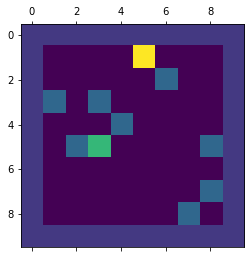

<Figure size 720x720 with 0 Axes>

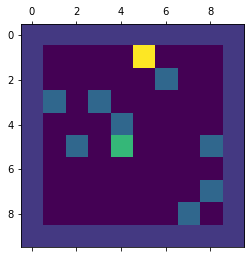

<Figure size 720x720 with 0 Axes>

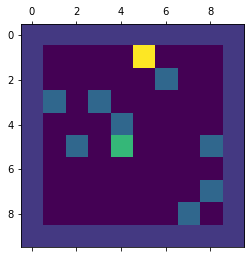

<Figure size 720x720 with 0 Axes>

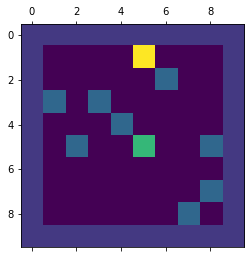

<Figure size 720x720 with 0 Axes>

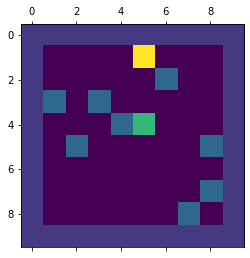

<Figure size 720x720 with 0 Axes>

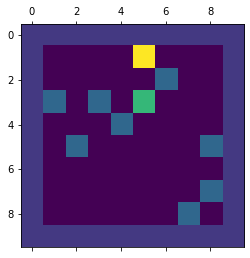

<Figure size 720x720 with 0 Axes>

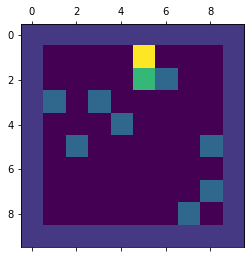

<Figure size 720x720 with 0 Axes>

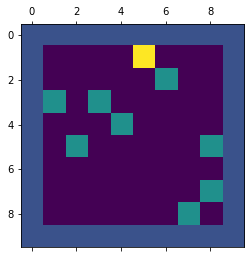

In [5]:
model = PPO1.load("../models/keep/{}".format(model_name))

env = MyEnv(N=10)
obs = env.reset()
for _ in range(200):
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    env.render()
    if done is True:
        break